In [1]:
import numpy as np
import uproot as up 
import os 
import matplotlib.pyplot as plt
import yaml
import mplhep as hep

os.environ["DPUSER"] = '/work/submit/mori25/Darkphotons_ludo/'
DP_USER = os.environ.get("DPUSER", None)

def load_analysis_config():
    try:
        with open(os.path.join(DP_USER,"offline_analysis/config/analysis_config.yml"), "r") as f:
            config = yaml.load(f, Loader=yaml.FullLoader)
        return config
    except Exception as e: 
        raise e
    
config = load_analysis_config()


In [2]:
def plot_hist(data,names,nbins=100, weights = None, xlabel = None, saveas=None, text = None, xlim=None, ylim=None, logy = False, logx=False, density=False, int_xticks = False, labels=None, sim=True):
    hep.style.use("CMS")
    colors = plt.cm.tab10.colors
    fig, ax = plt.subplots(figsize=(12,9))
    hep.cms.label("Preliminary",data=True,lumi=config["lumi"]["offline"],com=config["com"])
    if weights is not None:
        for d,w,name,c in zip(data,weights,names,colors[:len(data)]):
            print(name," done")
            ax.hist(d, bins = nbins, weights=w, range = xlim, label=name, color=c, density = density, log=logy, histtype='step', linewidth=2)
            # ax.hist(d, bins = nbins, range = xlim, color=c, density = density, log=log, alpha = 0.5)# hatch = '*',
    else: 
        for d,name,c in zip(data,names,colors[:len(data)]):
            ax.hist(d, bins = nbins, range = xlim, label=name, color=c, density = density, log=logy, histtype='step', linewidth=2)
            # ax.hist(d, bins = nbins, range = xlim, color=c, density = density, log=log, alpha = 0.5)# hatch = '*',
    if (xlabel): ax.set_xlabel(xlabel)
    if text!=None: ax.text(0.02, .8, text, fontsize=13, bbox=dict(facecolor='white'), transform=ax.transAxes) 
    if int_xticks: ax.xaxis.get_major_locator().set_params(integer=True)
    if labels is not None:
        for label in labels:
            ax.text(label['m'],label["freq"],label["name"],fontsize=15)
    l = density*'Normalized f'+ (density==False)*'F'+'requency'
    ax.set_ylabel(l)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.legend()
    if logx: plt.xscale('log')
    ax.grid(True)
    if saveas: 
        plt.savefig(saveas)
        print(f"saved figure as {saveas}")
    return

In [3]:

pathJpsiMC = os.path.join(config["locations"]["MC_InclusiveMinBias"]["Jpsi"],"merged_A.root:tree")
pathJpsiData = os.path.join(config["locations"]["offline"]["Jpsi"],"merged_A.root:tree")
pathYMC = os.path.join(config["locations"]["MC_InclusiveMinBias"]["Y"],"mergedY1_A.root:tree")
pathYData = os.path.join(config["locations"]["offline"]["Y"],"merged_A_bkp.root:tree")

pathMClmDY = os.path.join(config["locations"]["MC_lmDY"]["inclusive"],"merged_A.root:tree")

pathOffNormalData = "/data/submit/mori25/dark_photons_ludo/DimuonTrees/offline_normal/DimuonTree0.root:tree"

treeJpsiMC = up.open(pathJpsiMC)
treeJpsiData = up.open(pathJpsiData)
treeYMC = up.open(pathYMC)
treeYData = up.open(pathYData)

treeNormalData = up.open(pathOffNormalData)

treelmDY = up.open(pathMClmDY)


massJpsi = treeJpsiData["Mm_mass"].array() 
massJpsiMC = treeJpsiMC["Mm_mass"].array() 
massY = treeYData["Mm_mass"].array() 
massYMC = treeYMC["Mm_mass"].array() 

massNormal = treeNormalData["Mm_mass"].array()

masslmDY=treelmDY["Mm_mass"].array()


TPSamples=up.open("/data/submit/mori25/dark_photons_ludo/DimuonTrees/offline/Jpsi/TP_samples_Jpsi.root:tree")
TPSamplesMC=up.open("/data/submit/mori25/dark_photons_ludo/DimuonTrees/MC_InclusiveMinBias/Jpsi/TP_samples_Jpsi.root:tree")



<TH1D (version 3) at 0x7f01207741d0>


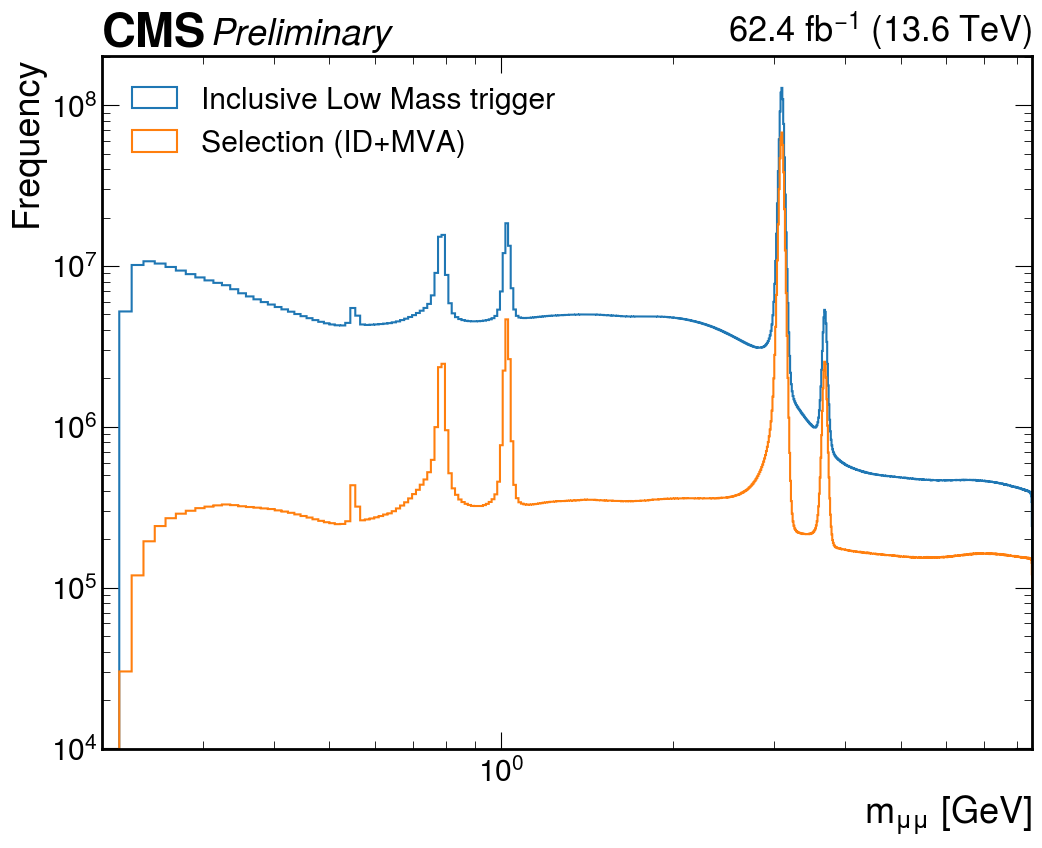

In [4]:
hist = up.open("/data/submit/mori25/dark_photons_ludo/DimuonTrees/histograms/offline/output_histogram_full_1to8.root")
print(hist['massforLimitFullSelected'])

def plotHist(hists,labels):
    hep.style.use("CMS")
    colors = plt.cm.tab10.colors
    fig, ax = plt.subplots(figsize=(12,9))
    hep.cms.label("Preliminary",data=True,lumi=config["lumi"]["offline"],com=config["com"])
    
    for h,l in zip(hists,labels):
        w, m = h.to_numpy()
        ax.hist((m[:-1]+m[1:])*0.5,weights=w,bins=len(w),log=True,histtype='step',linewidth=1.5,label=l)# bins = nbins, weights=w, range = xlim, label=name, color=c, density = density, log=logy, histtype='step', linewidth=2)
    ax.set_xlim((0.2,8.5))
    ax.legend()
    ax.set_xscale('log')
    ax.set_xlabel(r"$m_{\mu\mu}$ [GeV]")
    ax.set_ylabel(r"Frequency")
plotHist([hist["massforLimitFullILMD"],hist["massforLimitFullSelected"]],["Inclusive Low Mass trigger","Selection (ID+MVA)"])


In [33]:
def significance(q,selection):
    h = hist["massforLimitFullSelected"] if selection else hist["massforLimitFullILMD"] 
    w, m = h.to_numpy()
    masses = (m[:-1]+m[1:])*0.5
    if q == "Phi":
        s = np.sum(w[(masses>1.017)&(masses<1.021)])
        b =np.sum(w[((masses>0.85)&(masses<0.95))|(masses>1.07)&(masses<1.27)])
    elif q == "Jpsi":
        s = np.sum(w[(masses>3.0886)&(masses<3.0986)])
        b =np.sum(w[((masses>2.6)&(masses<2.9))|(masses>3.26)&(masses<3.56)])
    elif q == "Psi2":
        s = np.sum(w[(masses>3.68)&(masses<3.71)])
        b =np.sum(w[((masses>3.3)&(masses<3.5))|(masses>3.85)&(masses<4.05)])

    return s/np.sqrt(b)

print(significance("Phi", True)/ significance("Phi", False), significance("Jpsi", True)/ significance("Jpsi", False), significance("Psi2", True)/ significance("Psi2", False))

0.9531218835813896 1.3323516824732102 0.9924424215819162


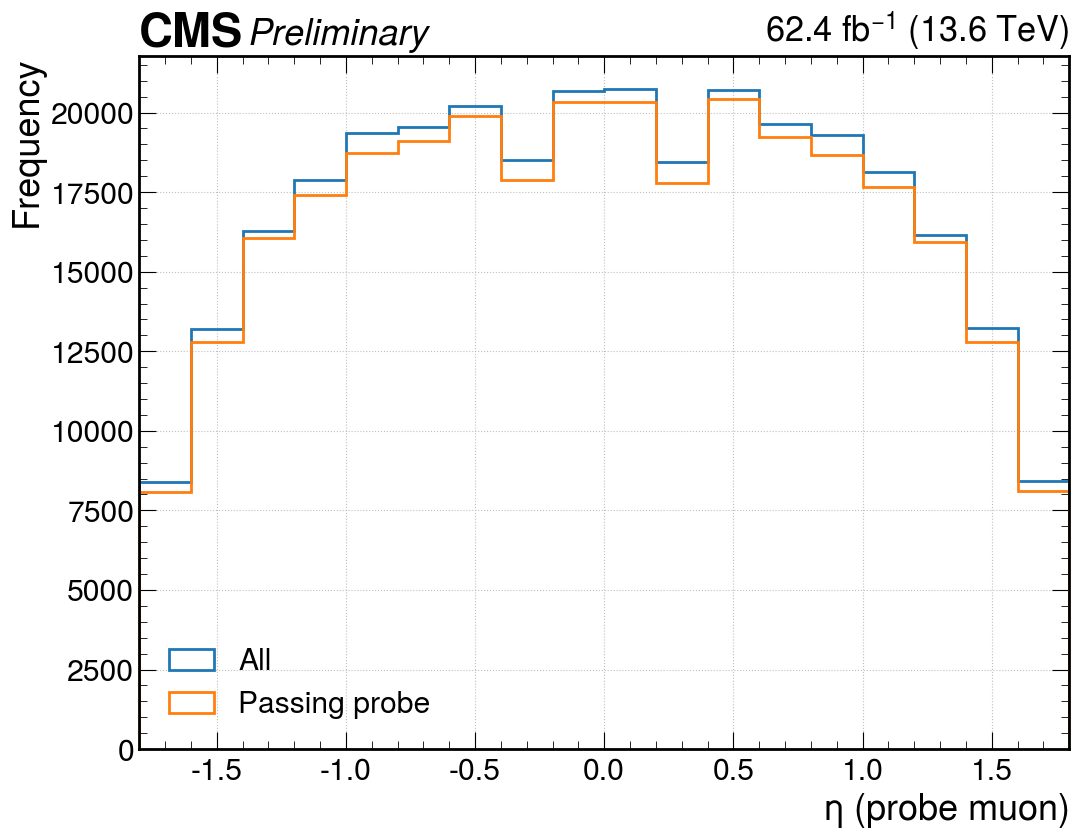

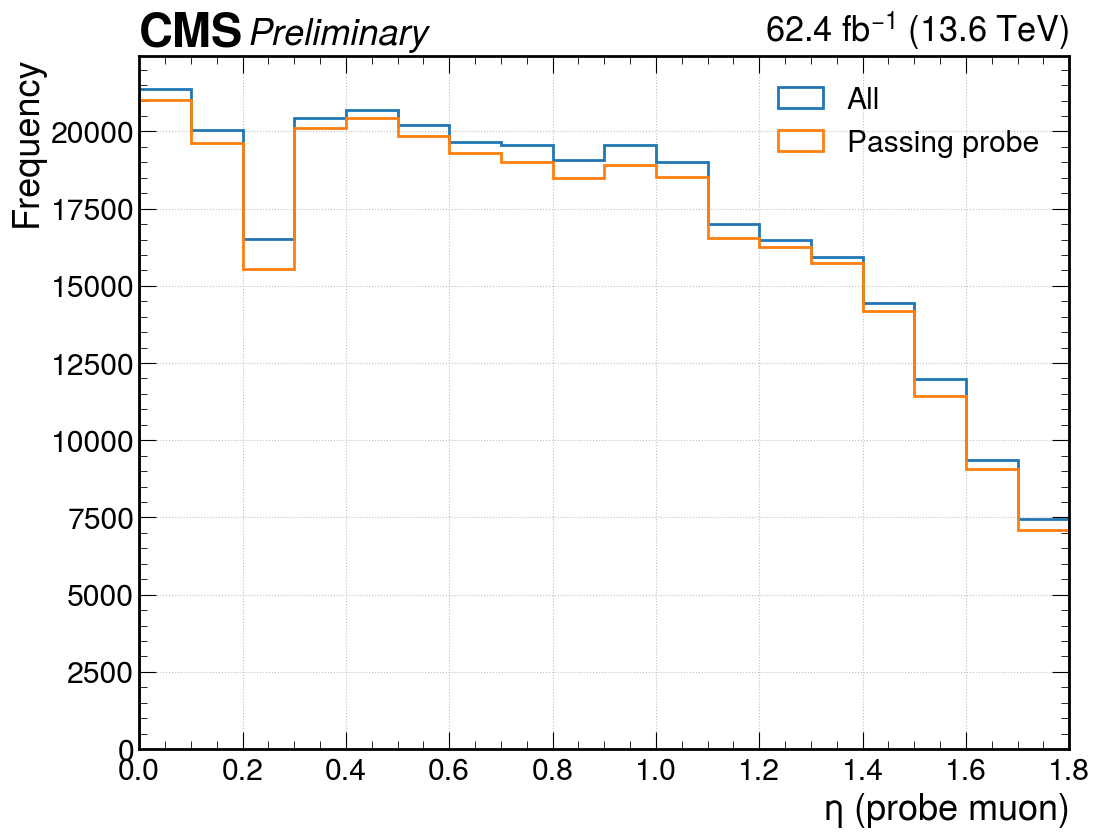

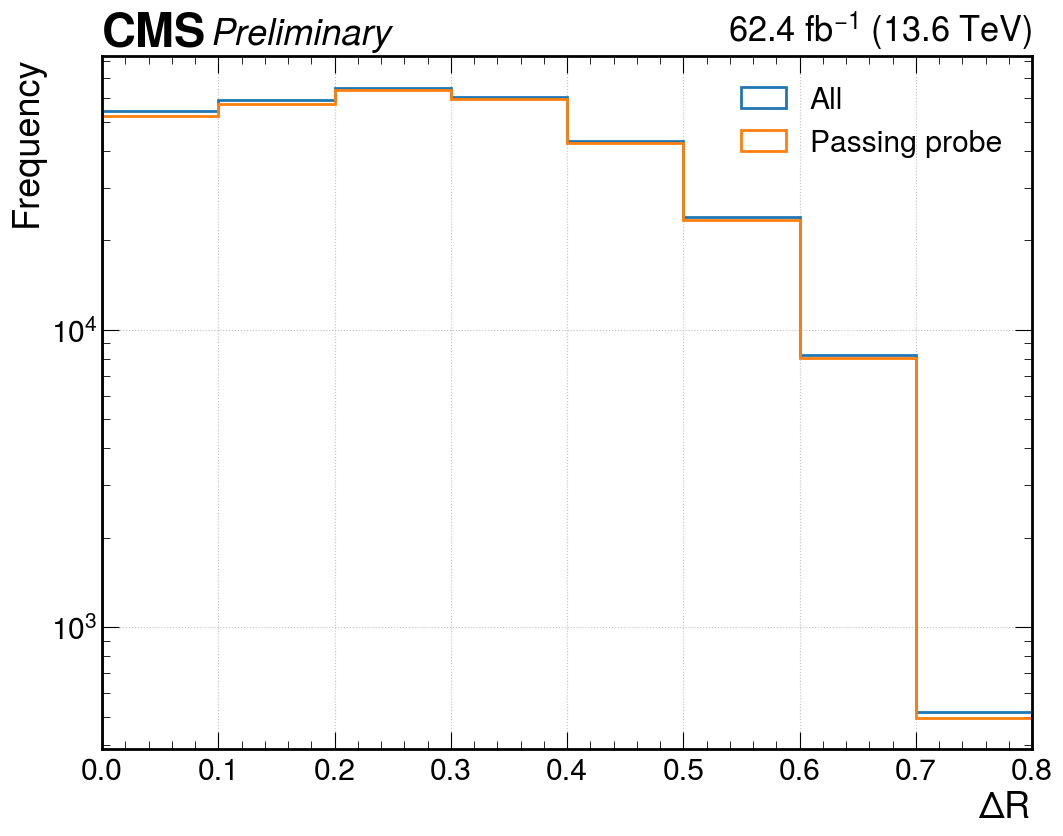

In [30]:
plot_hist([TPSamplesMC["Probe_eta"].array()[(TPSamplesMC["HLT_DoubleMu4_3_LowMass"].array(library='np')==1)],TPSamplesMC["Probe_eta"].array(library='np')[(TPSamplesMC["PassingProbeSoftId"].array(library='np')==1)&(TPSamplesMC["HLT_DoubleMu4_3_LowMass"].array(library='np')==1)]],["All","Passing probe"],xlim =(-1.8,1.8), xlabel=str("$\eta$ (probe muon)"),nbins=18, density=False)
plot_hist([TPSamplesMC["Probe_abs_eta"].array()[(TPSamplesMC["HLT_DoubleMu4_3_LowMass"].array(library='np')==1)],TPSamplesMC["Probe_abs_eta"].array(library='np')[(TPSamplesMC["PassingProbeSoftId"].array(library='np')==1)&(TPSamplesMC["HLT_DoubleMu4_3_LowMass"].array(library='np')==1)]],["All","Passing probe"],xlim =(0,1.8), xlabel=str("$\eta$ (probe muon)"),nbins=18, density=False)
plot_hist([TPSamplesMC["Mm_dR"].array()[(TPSamplesMC["HLT_DoubleMu4_3_LowMass"].array(library='np')==1)],TPSamplesMC["Mm_dR"].array(library='np')[(TPSamplesMC["PassingProbeSoftId"].array(library='np')==1)&(TPSamplesMC["HLT_DoubleMu4_3_LowMass"].array(library='np')==1)]],["All","Passing probe"],xlim =(0,0.8), xlabel=str("$\Delta$R "),nbins=8, density=False,logy=True)

In [13]:
d = up.concatenate("/data/submit/mori25/dark_photons_ludo/DimuonTrees/offline/dump/DimuonTree*.root:tree", ["Mm_mass","HLT_DoubleMu4_3_LowMass","HLT_Dimuon10_Upsilon_y1p4"], allow_missing=True)

In [14]:
# # write code that finds the empty root files in a folder 
# import sys
# for i in range(1442):
#     if i and i%10 == 0: 
#         print(f"Processing {i}/{1442}", end="\r")
#         sys.stdout.flush()
#     try: 
#         filename = f"/data/submit/mori25/dark_photons_ludo/DimuonTrees/offline/dump/DimuonTree{i}.root:tree"
#         intree = up.open(filename)
#     except Exception as e: 
#         print(f"Error with file {filename}")
#         print(e)

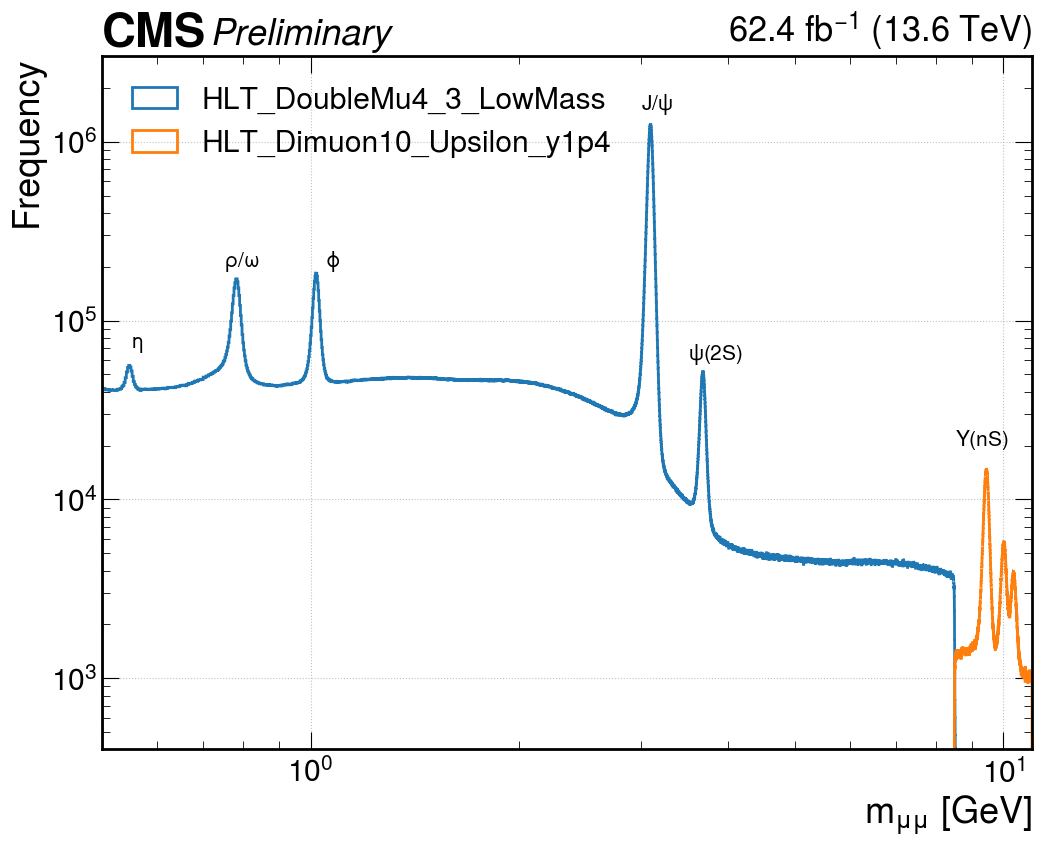

In [15]:
dmtrigger = d["HLT_DoubleMu4_3_LowMass"]#.array(library='np')
Ytrigger = d["HLT_Dimuon10_Upsilon_y1p4"]#.array(library='np')
# Y12trigger = d["HLT_Dimuon12_Upsilon_y1p4"]#.array(library='np')

#                 ax.text(label['m'],label["freq"],label["name"],fontsize=13)

labels = [
    { 'm': 0.55, 'name': r"$\eta$", 'freq': 0.7e5 },
    { 'm': 0.75, 'name': r"$\rho/\omega$", 'freq': 2e5 },
    { 'm': 1.05, 'name': r"$\phi$", 'freq': 2e5 },
    { 'm': 3, 'name': r"$J/\psi$", 'freq': 1.5e6 },
    { 'm': 3.5, 'name': r"$\psi(2S)$", 'freq': 6e4 },
    { 'm': 8.5, 'name': r"$\Upsilon(nS)$", 'freq': 2e4 }
]

mass = d["Mm_mass"]#.array()
mass_dmtrigger = d["Mm_mass"][dmtrigger]
mass_Ytrigger = d["Mm_mass"][Ytrigger]
# mass_Y12trigger = d["Mm_mass"][Y12trigger]
plot_hist([mass_dmtrigger,mass_Ytrigger],["HLT_DoubleMu4_3_LowMass","HLT_Dimuon10_Upsilon_y1p4","HLT_Dimuon12_Upsilon_y1p4"],xlim = (0.5,11),ylim=(400,3000000), xlabel=str("$m_{\mu\mu}$ [GeV]"),nbins=5000,logx=True,logy=True, density=False, labels=labels) #3.45,3.9

In [16]:
mass_lmoff = d["Mm_mass"][~dmtrigger]
print(np.sum(~dmtrigger&(mass<12)&(mass>8))/np.sum((mass<12)&(mass>8)))

0.8016222435289122


In [17]:
d = up.concatenate("/data/submit/mori25/dark_photons_ludo/DimuonTrees/offline/dump_post_BDT/*10*.root:tree", allow_missing=True)

In [18]:
ev= d[(d["HLT_DoubleMu4_3_LowMass"]==1)&(d["forest_prompt_Jpsi_mva"]>0.96)& (d["Mm_mass"]>5)]

In [19]:
print(ev[0]["run"])
print(ev[0]["lumSec"])
print(ev[0]["Event"])

367264.0
677.0
1457651610.0


In [17]:
d = up.concatenate("/data/submit/mori25/dark_photons_ludo/DimuonTrees/MC_lmDY/dump_post_BDT/*.root:tree", allow_missing=True)

650719 258190


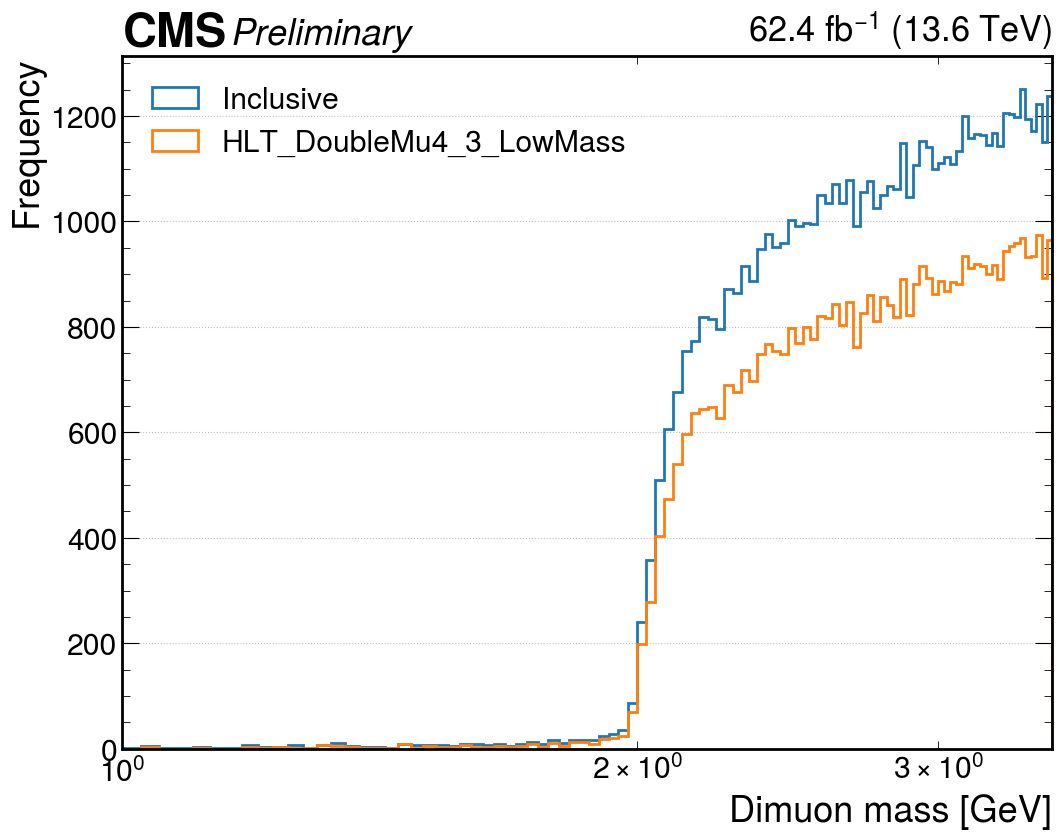

In [18]:
dmtrigger = d["HLT_DoubleMu4_3_LowMass"]==1#.array(library='np')
# Ytrigger = d["HLT_Dimuon10_Upsilon_y1p4"]#.array(library='np')
# Y12trigger = d["HLT_Dimuon12_Upsilon_y1p4"]#.array(library='np')

mass = d["Mm_mass"]#.array()
print(len(mass),np.sum(dmtrigger))
mass_dmtrigger = d["Mm_mass"][dmtrigger]
plot_hist([mass,mass_dmtrigger],["Inclusive","HLT_DoubleMu4_3_LowMass","HLT_Dimuon10_Upsilon_y1p4","HLT_Dimuon12_Upsilon_y1p4"],xlim = (1,3.5), xlabel=str("Dimuon mass [GeV]"),nbins=100,logx=True ,density=False) #3.45,3.9

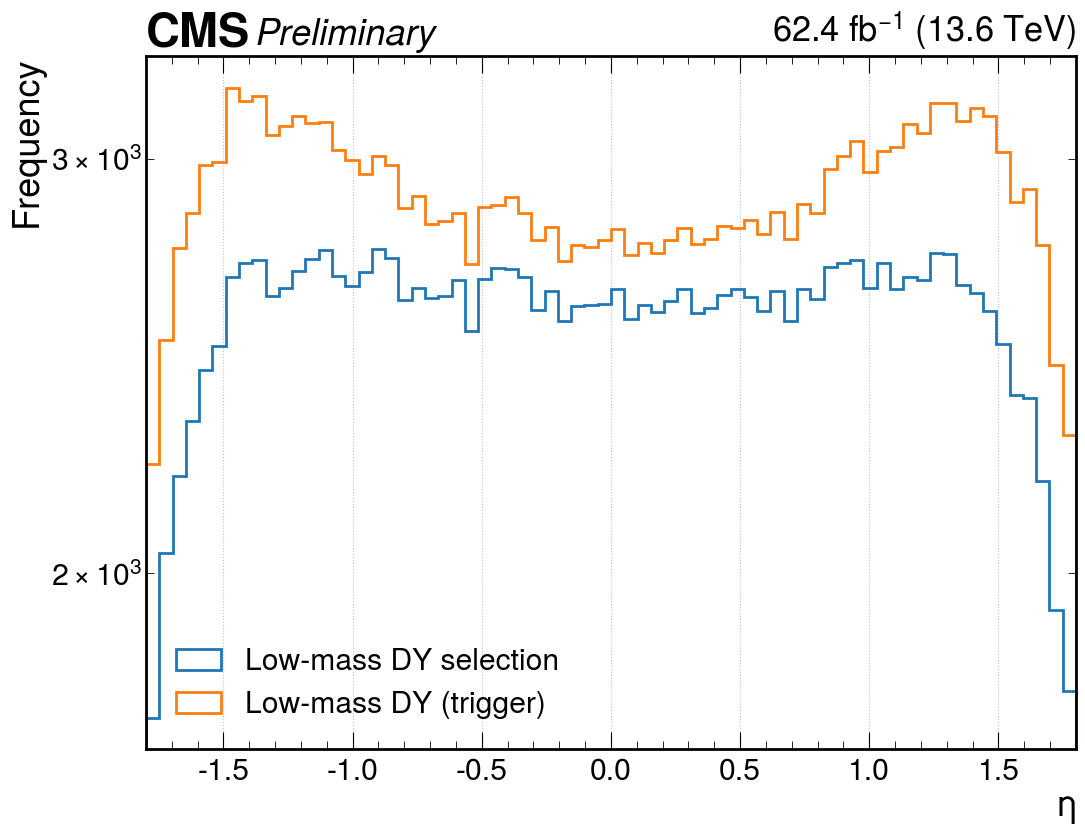

In [23]:
# signal_pure = treeJpsiData[q].array()[sjpsi]
# signal_weights = treeJpsiData["weights_prompt"].array()[sjpsi]
# bkg_pure = treeJpsiData[q].array()[bkgjpsi]
# signal_MC = treeJpsiMC[q].array()#[treeMC["Mm_kin_pt"].array() > 10]
signal_lmDY = d["Mm_kin_eta"][dimuonTriggerCut & (d["forest_prompt_Jpsi_mva"]>0.8)]#[treeMC["Mm_kin_pt"] > 10]
signal_lmDY_triggered = d["Mm_kin_eta"][dimuonTriggerCut]#[treeMC["Mm_kin_pt"].array() > 10]
plot_hist([signal_lmDY,signal_lmDY_triggered],["Low-mass DY selection", "Low-mass DY (trigger)"],xlabel=str(r"$\eta$"),xlim=(-1.8,1.8),density=False, logy=True, nbins = 70,sim=True)#,signal_id,bkg_id

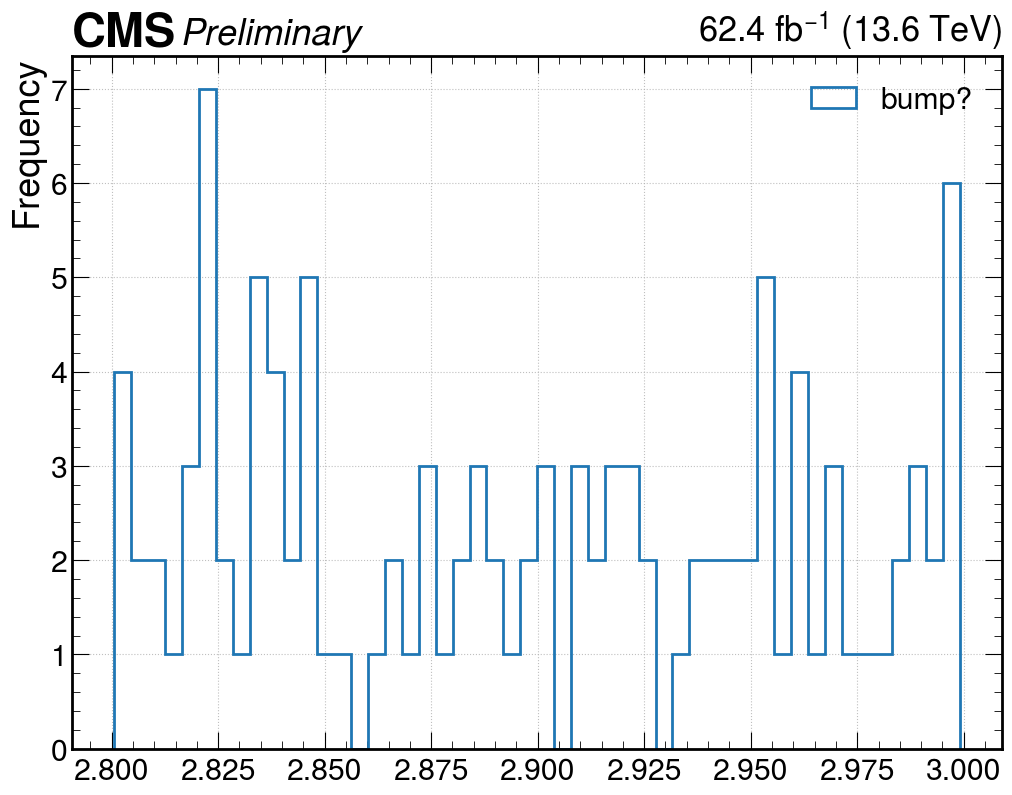

In [22]:
mass_cut = (d["Mm_mass"]>2.8) & (d["Mm_mass"]<3.)
pt_cut = (d["Mm_mu1_pt"]>15) & (d["Mm_mu2_pt"]>15)
# print(sum(pt_cut))
# plot_hist([d["Mm_mass"][mass_cut&pt_cut]],["bump?"],nbins=50)

In [23]:
dMC = up.concatenate("/data/submit/mori25/dark_photons_ludo/DimuonTrees/MC_InclusiveMinBias/dump/DimuonTreeInclusive*.root:tree", ["Mm_mass","HLT_DoubleMu4_3_LowMass","HLT_Dimuon10_Upsilon_y1p4" ],allow_missing=True)

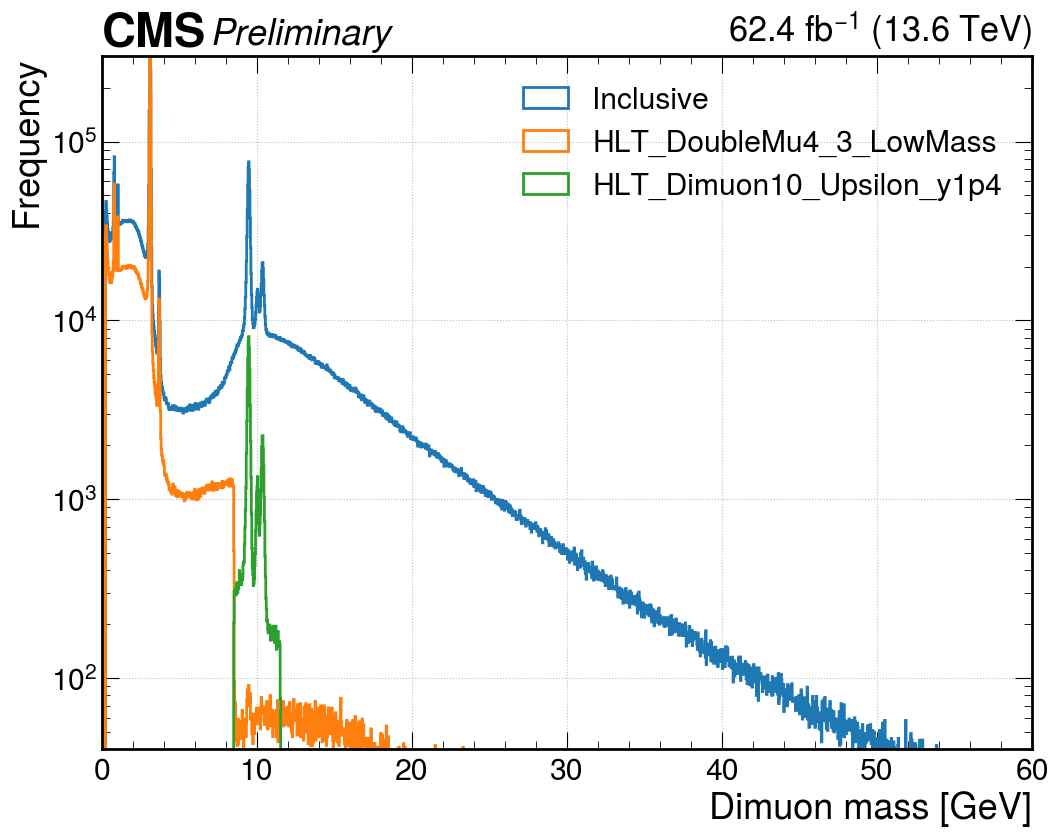

In [24]:
dmtrigger = dMC["HLT_DoubleMu4_3_LowMass"]#.array(library='np')
Ytrigger = dMC["HLT_Dimuon10_Upsilon_y1p4"]#.array(library='np')
# Y12trigger = dMC["HLT_Dimuon12_Upsilon_y1p4"]#.array(library='np')



mass = dMC["Mm_mass"]#.array()
mass_dmtrigger = dMC["Mm_mass"][dmtrigger]
mass_Ytrigger = dMC["Mm_mass"][Ytrigger]
# mass_Y12trigger = dMC["Mm_mass"][Y12trigger]
plot_hist([mass,mass_dmtrigger,mass_Ytrigger],["Inclusive","HLT_DoubleMu4_3_LowMass","HLT_Dimuon10_Upsilon_y1p4","HLT_Dimuon12_Upsilon_y1p4"],xlim = (0,60), ylim=(40,300000),xlabel=str("Dimuon mass [GeV]"),nbins=2000,logy=True, density=False)

In [5]:

fYMC = up.open(os.path.join(config["locations"]["sPlot"], "files/data_withSWeight_Y_MC1M.root:RooTreeDataStore_dataWithSWeights_data_full")).arrays(cut="(HLT_Dimuon10_Upsilon_y1p4==1)")
fYData = up.open(os.path.join(config["locations"]["sPlot"], "files/data_withSWeight_Y_data1M.root:RooTreeDataStore_dataWithSWeights_data_full")).arrays( cut="(HLT_Dimuon10_Upsilon_y1p4==1 )")


# fY1MC = up.open(os.path.join(config["locations"]["sPlot"], "files/data_withSWeight_Y_MC1M.root:RooTreeDataStore_dataWithSWeights_data_full")).arrays(cut="(HLT_DoubleMu4_3_LowMass==0)")
# fY1Data = up.open(os.path.join(config["locations"]["sPlot"], "files/data_withSWeight_Y_data1M.root:RooTreeDataStore_dataWithSWeights_data_full")).arrays( cut="(HLT_DoubleMu4_3_LowMass==0 )")
# fYMC = fYMC[abs(fYMC["Mm_kin_eta"])<6]
# fYData = fYData[abs(fYData["Mm_kin_eta"])<6]

fJpsiMC = up.open(os.path.join(config["locations"]["sPlot"], "files/data_withSWeight_Jpsi_MC1M.root:RooTreeDataStore_dataWithSWeights_data_full")).arrays(cut="HLT_DoubleMu4_3_LowMass==1")
fJpsiData = up.open(os.path.join(config["locations"]["sPlot"], "files/data_withSWeight_Jpsi_data1M.root:RooTreeDataStore_dataWithSWeights_data_full")).arrays(cut="HLT_DoubleMu4_3_LowMass==1")

In [6]:

branches = {"Mm_kin_lxy":{'t': 'f','lim' : (0,0.2)},
            "Mm_mass":{'t':'f','lim':(0,20)},
            # "Muon_softMva1":{'t': 'f','lim' : (-1,1)},
            # "Muon_softMva2":{'t': 'f','lim' : (-1,1)},
            "Mm_kin_l3d":{'t': 'f','lim' : (0,0.2)},
            "Mm_iso":{'t': 'f','lim' : None},
            
            "Mm_kin_vtx_chi2dof":{'t': 'f','lim' : (0,20)},
            # "Mm_kin_vtx_prob":{'t': 'f','lim' : (0,1)},
            "Mm_kin_alpha":{'t': 'f','lim' : (0,np.pi)},
            # "Mm_kin_alphaBS":{'t': 'f','lim' : (0,np.pi)},
            # "Mm_closetrk":{'t': 'i','lim' : (0,10)},
            # "Mm_closetrks1":{'t': 'i','lim' : (0,80)},
            # "Mm_closetrks2":{'t': 'i','lim' : (0,120)},
            # "Mm_kin_pvip":{'t': 'f','lim' : (0,0.05)},
            # "Mm_kin_spvip":{'t': 'f','lim' : (0,20)},
            # "Mm_m1iso":{'t': 'f','lim' : (0,1)},
            # "Mm_m2iso":{'t': 'f','lim' : (0,1)},
            # "Mm_kin_sl3d":{'t': 'f','lim' : (0,20)},
            # "Mm_nDisTrks":{'t': 'i','lim' : (0,8)},
            "Mm_mu1_pt":{'t': 'f','lim' : (0,20)},
            # "Mm_mu2_pt":{'t': 'f','lim' : (0,20)},
            "Mm_kin_pt":{'t': 'f','lim' : (0,40)},
            # "Mm_mu2_eta":{'t': 'f','lim' :None},
            # "Mm_docatrk":{'t': 'i','lim' : (0,8)},    
            "Mm_kin_eta":{'t': 'f','lim' :None},    
            "Mm_mu1_eta":{'t': 'f','lim' :None},    
            # "Mm_mu2_eta":{'t': 'f','lim' :None},    
            # "Mm_kin_pvlip":{'t': 'f','lim' :(0,0.1)},
            # "Mm_otherVtxMaxProb":{'t': 'f','lim' :(0.8,1)},
            # "Mm_otherVtxMaxProb1":{'t': 'f','lim' :(0.8,1)},
            # "Mm_otherVtxMaxProb2":{'t': 'f','lim' :(0,1)},
            # "Mm_mva":{'t': 'f','lim' :(-0.2,0.2)}
            }

In [7]:
sjpsi = [False for i in range(len(massJpsi))] 
for lims in config["BDT_training"]["Jpsi"]["limits"]["signal"]:
    sjpsi = sjpsi|((massJpsi>lims[0])&(massJpsi<lims[1]))
bkgjpsi = [False for i in range(len(massJpsi))] 
for lims in config["BDT_training"]["Jpsi"]["limits"]["background"]:
    bkgjpsi = bkgjpsi|((massJpsi>lims[0])&(massJpsi<lims[1]))

sY = [False for i in range(len(massY))] 
for lims in config["BDT_training"]["Y"]["limits"]["signal"][:-2]:
    sY = sY|((massY>lims[0])&(massY<lims[1]))
bkgY = [False for i in range(len(massY))] 
for lims in config["BDT_training"]["Y"]["limits"]["background"]:
    bkgY = bkgY|((massY>lims[0])&(massY<lims[1]))



sY_normal=[False for i in range(len(massNormal))] 
for lims in config["BDT_training"]["Y"]["limits"]["signal"][:-2]:
    sY_normal = sY_normal|((massNormal>lims[0])&(massNormal<lims[1]))
bkgY_normal = [False for i in range(len(massNormal))] 
for lims in config["BDT_training"]["Y"]["limits"]["background"]:
    bkgY_normal = bkgY_normal|((massNormal>lims[0])&(massNormal<lims[1]))


dimuonTriggerCut = treelmDY["HLT_DoubleMu4_3_LowMass"].array()==1
print("efficiency dimuonTrigger", sum(dimuonTriggerCut)/len(dimuonTriggerCut))

print(len(treelmDY.arrays()))

# sjpsi_lmDY = [False for i in range(len(masslmDY))] 
# for lims in config["BDT_training"]["Jpsi"]["limits"]["signal"]:
#     sjpsi_lmDY = sjpsi_lmDY|((masslmDY>lims[0])&(masslmDY<lims[1]))
# bkgjpsi_lmDY = [False for i in range(len(masslmDY))] 
# for lims in config["BDT_training"]["Jpsi"]["limits"]["background"]:
#     bkgjpsi_lmDY = bkgjpsi_lmDY|((masslmDY>lims[0])&(masslmDY<lims[1]))

sjpsi_lmDY = treelmDY["Mm_gen_pdgId"].array()==443
print(sum(sjpsi_lmDY))

sY_lmDY = treelmDY["Mm_gen_pdgId"].array()==553
print(sum(sY_lmDY))


# print(len(massJpsi), len(massJpsiMC),len(massY), len(massYMC), )
# print(np.sum(sjpsi),massJpsi[sjpsi])

efficiency dimuonTrigger 0.3967764887762613
650719
26
4


In [8]:
from hist import Hist
import matplotlib.ticker as ticker
def plot(w,x,y,xlabel=None,err=None,int_w=False):
    hep.style.use("CMS")
    fig, ax = plt.subplots(figsize=(12,10))
    hep.cms.label("Preliminary",data=True,lumi=62.4,com=13.6)
    for i in range(len(w.T)):
        print(w.T[i])
        w.T[i]=w.T[i]/np.sum(w.T[i])
        print(w.T[i])
    mesh = ax.pcolormesh(x, y, w.T, cmap="coolwarm")#autumn

    # for i in range(len(x)-1):
    #     for j in range(len(y)-1):
    #         if not np.isnan(w[i,j]):
    #             if int_w : ax.text(1.1*x[i],(y[j]+y[j+1])/2,f"{int(w[i,j])}" + (f" $\pm$ {int(err[i,j])}" if err is not None else ""),fontsize=12,color="black",ha="center",va="center",weight='bold')
    #             else : ax.text(1.1*x[i],(y[j]+y[j+1])/2,f"{w[i,j]:.2f}" + (f"\n $\pm$ {err[i,j]:.2f}" if err is not None else ""),fontsize=12,color="black",ha="center",va="center",weight='bold')

    ax.set_xlabel(xlabel)
    ax.set_ylabel("BDT score")
    
    # ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:0.0f}'.format(x)))
    # ax.set_xticks([4, 10, 20])
    # ax.get_xaxis().set_major_formatt
    # plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
    # plt.gca().xaxis.set_minor_formatter(ticker.ScalarFormatter())
    # ax.ticklabel_format(style='plain')
    fig.colorbar(mesh)
    ax.legend()
    plt.show()  

def plot_frequency(tree,var,var_range):
    bdt_vals=tree["forest_prompt_Jpsi_mva"]
    var_vals=tree[var]
    prompt_w = tree["weights_prompt"]
    sig_w = tree["sigYield_sw"]

    w = prompt_w*sig_w/sum(prompt_w*sig_w)

    BDT_score=np.linspace(min(tree["forest_prompt_Jpsi_mva"]),max(tree["forest_prompt_Jpsi_mva"]),60)
    var_ax=np.linspace(*var_range,60)
    H = (
        Hist.new.Variable(var_ax, name="eta")
        .Variable(BDT_score, name="BDT")
        .Double()
    )
    print(np.shape(var_vals), np.shape(bdt_vals),np.shape(w))
    H.fill(eta = var_vals, BDT=bdt_vals,weight = w)
    plot(*H.to_numpy(),err=None,int_w=True,xlabel=var)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[818398] [818398] [818398]
[5.05457961e-07 1.41653122e-06 1.39397955e-06 2.06775765e-06
 3.35210758e-06 3.08638590e-06 3.76572672e-06 2.25797525e-06
 2.82075779e-06 2.66765749e-06 2.81180073e-06 3.07218463e-06
 2.41543951e-06 2.99301513e-06 2.80328988e-06 2.51851663e-06
 2.65190982e-06 2.62771478e-06 1.42253725e-06 1.86603987e-06
 1.73427067e-06 9.39142673e-07 1.19336778e-06 1.53390639e-06
 3.11786993e-07 7.39247139e-07 1.06485760e-06 1.21653878e-06
 1.12191546e-06 8.07167516e-07 1.00604924e-06 3.34297900e-07
 1.06179775e-06 2.75013669e-07 1.01663963e-06 7.61241167e-07
 1.15389860e-06 1.70458758e-06 1.94561465e-06 2.13104757e-06
 1.86965764e-06 1.77658085e-06 2.19908475e-06 1.71122486e-06
 1.94728375e-06 1.51120206e-06 2.58835532e-06 2.24813487e-06
 2.79086442e-06 4.16532687e-06 2.77978003e-06 2.30552616e-06
 3.22565823e-06 2.60205224e-06 3.27543310e-06 2.34010384e-06
 2.29144319e-06 1.23245207e-06 5.38386302e-07]
[0.0044351  0.01242923 0.01223135 0.01814336 0.02941278 0.02708123
 0.03

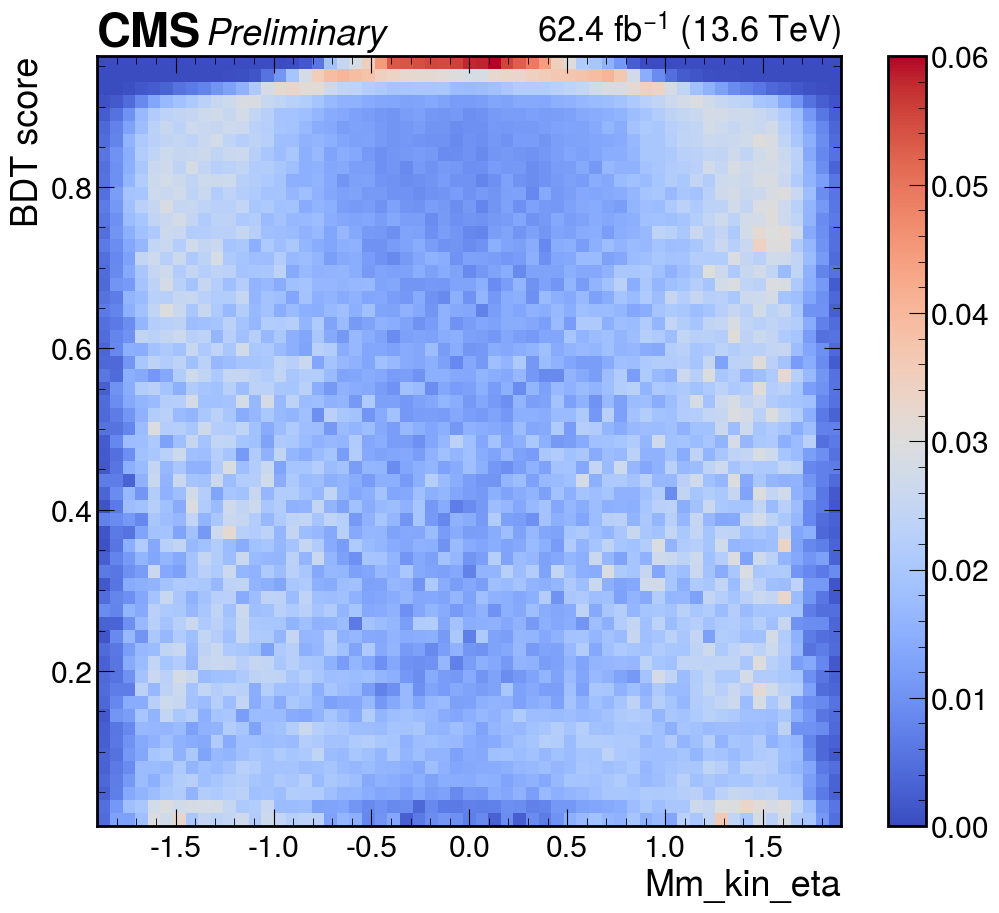

In [9]:
plot_frequency(fJpsiData,"Mm_kin_eta",(-1.9,1.9))

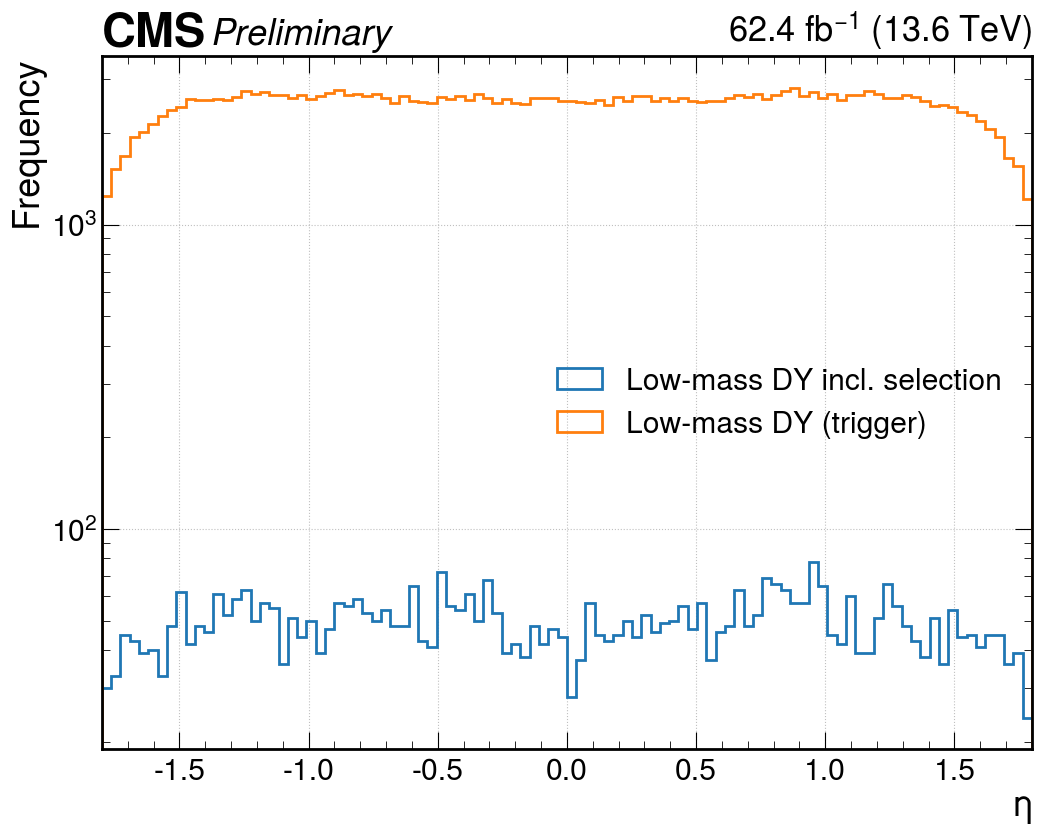

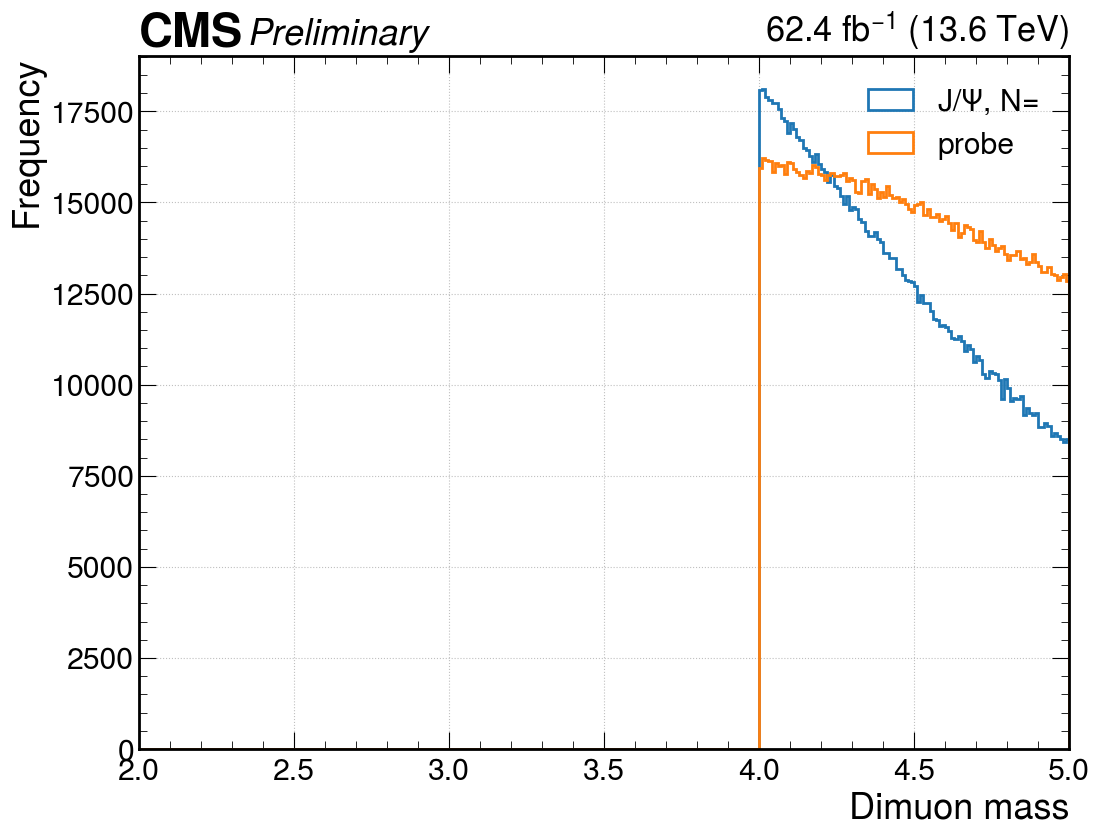

In [30]:
signal_pure = treeJpsiData["Mm_mass"].array()

bins=np.arange(1,6)+0.5
# for i in range(len(bins)-1):
#     x1=bins[i]
#     x2=bins[i+1]
#     cut=(treeJpsiData["Mm_mu2_pt"].array()>x1)&(treeJpsiData["Mm_mu1_pt"].array()<x2)
#     signal_bin_pt = signal_pure[cut]
#     plot_hist([signal_bin_pt],[f"J/$\Psi$ cut sig {x1}<pt<{x2}, N={sum(cut)}"],xlabel=str("Dimuon mass"),xlim=(2.6,3.6),nbins=300,log=False, density=False)

# plot_hist([treeJpsiData["Mm_mu2_pt"].array(),TPSamples["Probe_pt"].array()],[f"J/$\Psi$, N=","probe"],xlabel=str("Dimuon mass"),xlim=(2,5),nbins=300,logy=False, density=False)

# signal_pure = treeJpsiData["Mm_mass"].array()[sjpsi]
# bkg_pure = treeJpsiData["Mm_mass"].array()[bkgjpsi]
# signal_MClmDY_lm = treelmDY["Mm_mass"].array()[dimuonTriggerCut]#[treeMC["Mm_kin_lxy"].array() > 10]
# signal_MClmDY = treelmDY["Mm_mass"].array()
# signal_MC = treeJpsiMC["Mm_mass"].array()#[treeMC["Mm_kin_pt"].array() > 10]
# plot_hist([signal_pure,bkg_pure,signal_MClmDY,signal_MClmDY_lm,signal_MC][:-1],["J/$\Psi$ signal","J/$\Psi$ bkg.","MC lmDY Incl.","MC lmDY w/ lm trigger","J/$\Psi$ Incl. Dilept."],xlabel=str("Dimuon mass"),xlim=(1,17),nbins=300,log=False, density=False)

# signal_pure = treeJpsiData["Mm_kin_pt"].array()[sjpsi]
# bkg_pure = treeJpsiData["Mm_kin_pt"].array()[bkgjpsi]
# signal_MC = treeJpsiMC["Mm_kin_pt"].array()#[treeMC["Mm_kin_pt"].array() > 10]
# signal_MClmDY = treelmDY["Mm_kin_pt"].array()[dimuonTriggerCut]#[treeMC["Mm_kin_pt"].array() > 10]
# plot_hist([signal_pure,bkg_pure,signal_MC,signal_MClmDY],["J/$\Psi$ signal","J/$\Psi$ bkg.","J/$\Psi$ MC Incl","MC lmDY dmlm"],xlabel=str("Dimuon $p_T$"),xlim=branches["Mm_kin_pt"]['lim'],density=True)#,signal_id,bkg_id

# signal_pure = treeYData["Mm_kin_pt"].array()[sY]
# bkg_pure = treeYData["Mm_kin_pt"].array()[bkgY]
# signal_MC = treeYMC["Mm_kin_pt"].array()#[treeMC["Mm_kin_pt"].array() > 10]
# signal_MClmDY = treelmDY["Mm_kin_pt"].array()[dimuonTriggerCut]#[treeMC["Mm_kin_pt"].array() > 10]
# plot_hist([signal_pure,bkg_pure,signal_MC,signal_MClmDY],["Y signal","Y bkg.","Y MC Incl","MC lmDY dmlm"],xlabel=str("Dimuon $p_T$"),xlim=branches["Mm_kin_pt"]['lim'],density=True)#,signal_id,bkg_id

# signal_pure = treeJpsiData["Mm_kin_lxy"].array()[sjpsi]
# signal_pureY = treeYData["Mm_kin_lxy"].array()[sY]
# bkg_pure = treeJpsiData["Mm_kin_lxy"].array()[bkgjpsi]
# signal_MC = treeJpsiMC["Mm_kin_lxy"].array()#[treeMC["Mm_kin_lxy"].array() > 10]
# signal_MClmDY = treelmDY["Mm_kin_lxy"].array()[dimuonTriggerCut]#[treeMC["Mm_kin_lxy"].array() > 10]
# plot_hist([signal_pure,bkg_pure,signal_MC,signal_MClmDY, signal_pureY],["J/$\Psi$ signal","J/$\Psi$ bkg.","J/$\Psi$ MC Incl","J/$\Psi$ MC lmDY", "Y(1S) signal"],xlabel=str("Mm_kin_lxy"),xlim=branches["Mm_kin_lxy"]['lim'],density=True)#,signal_id,bkg_id

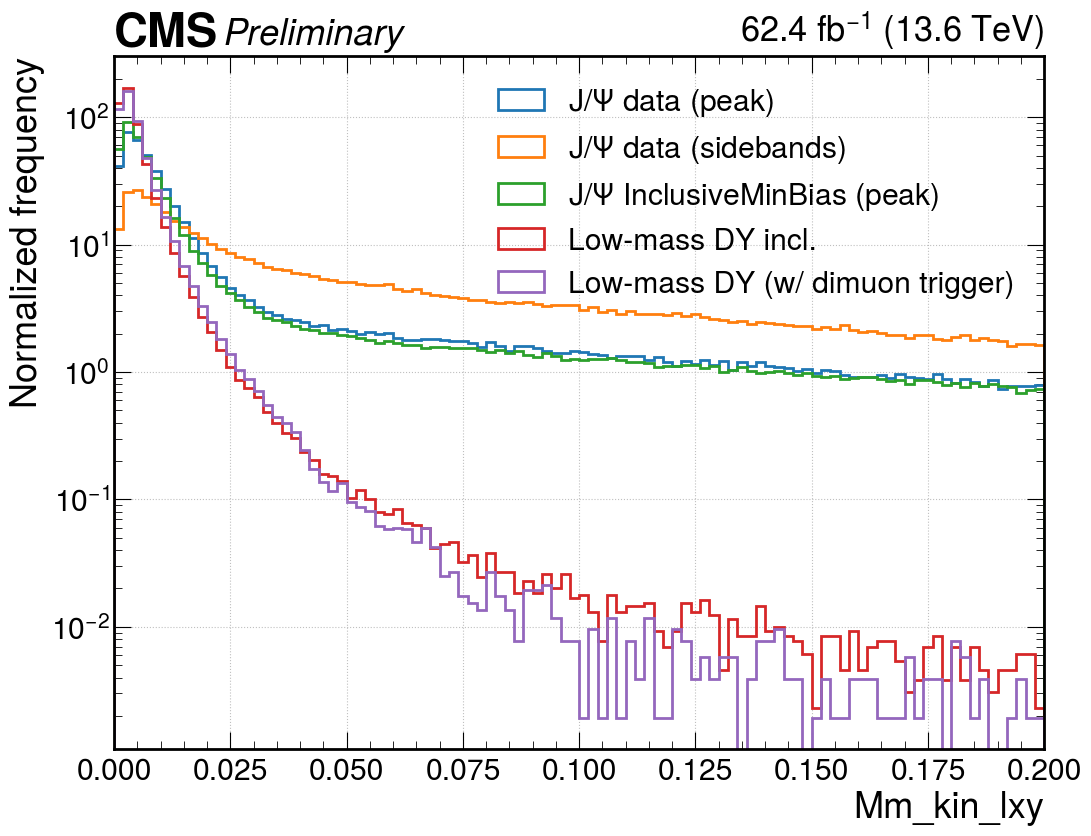

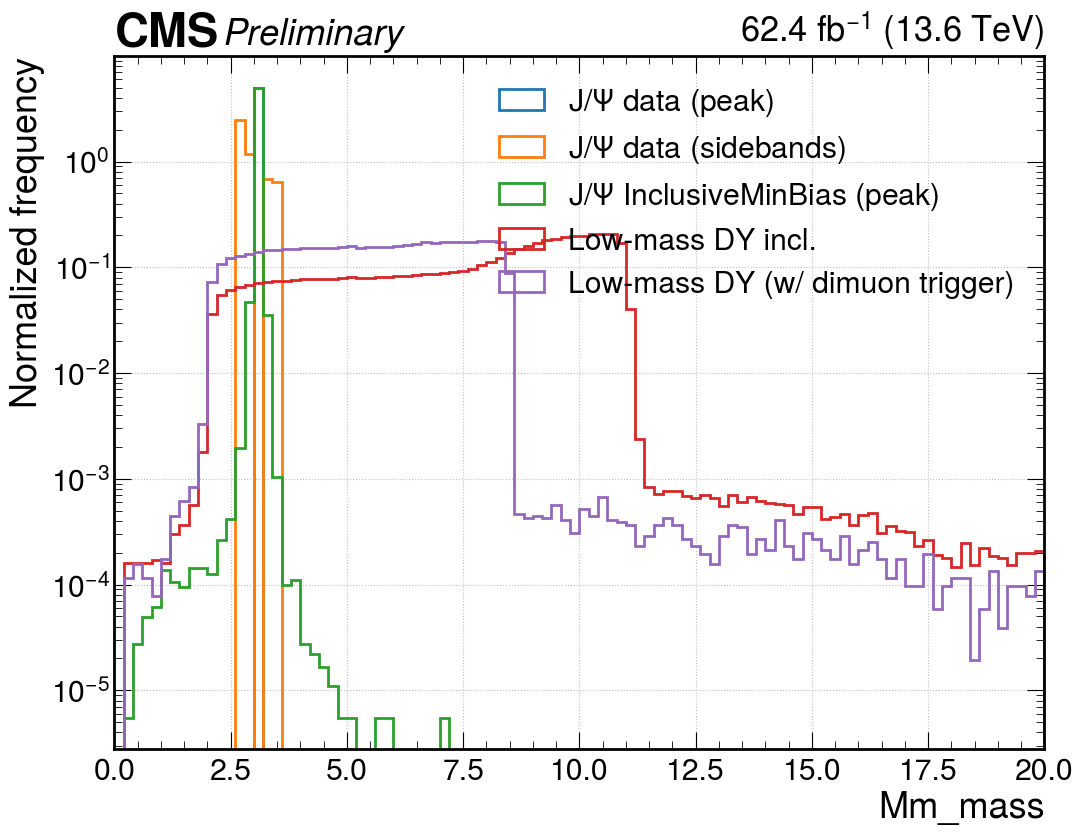

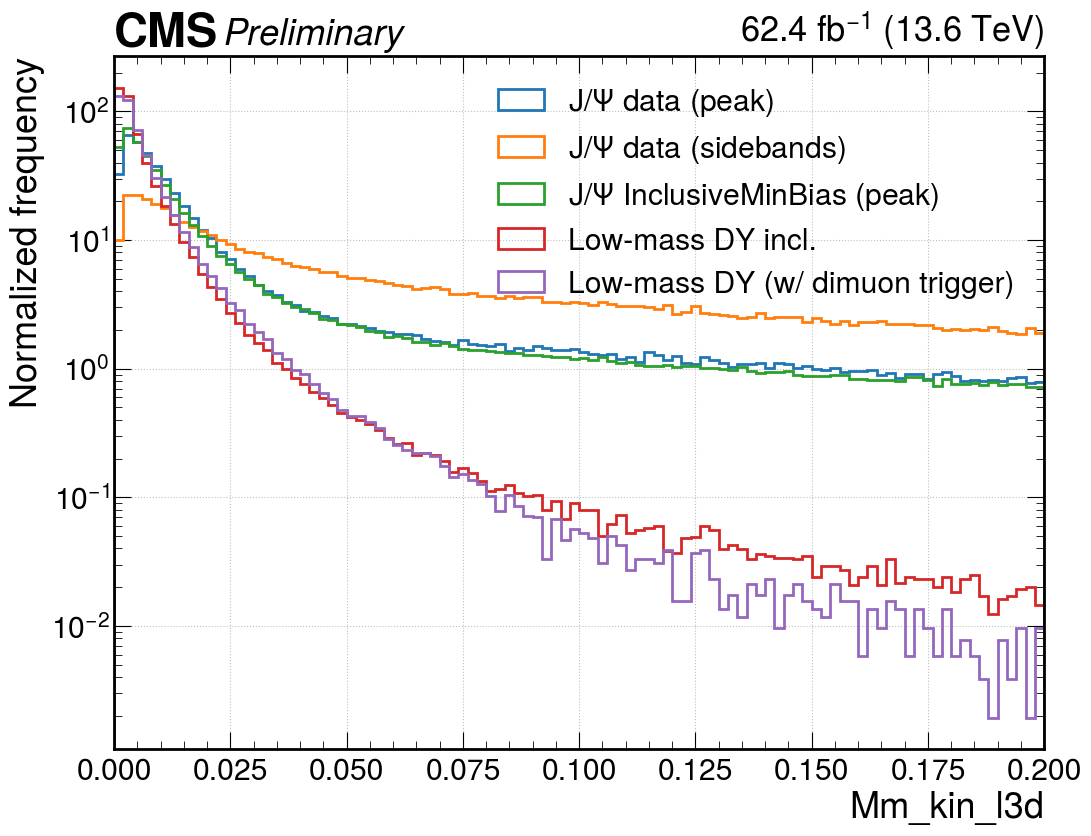

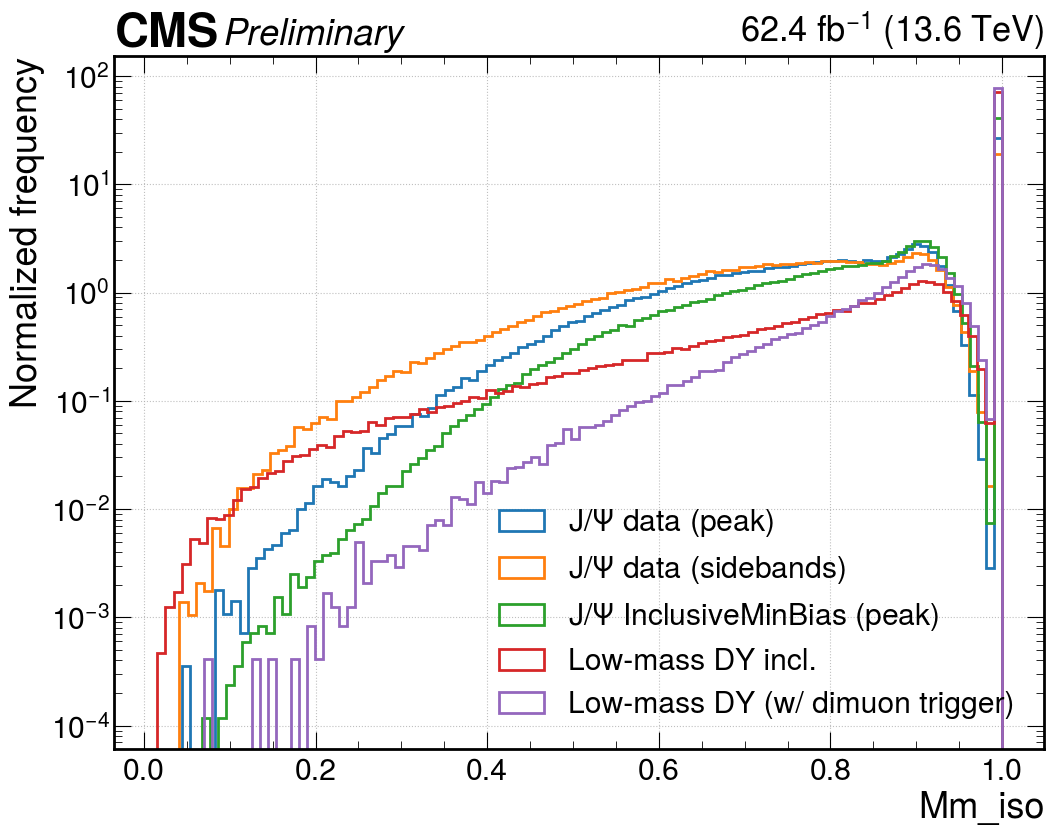

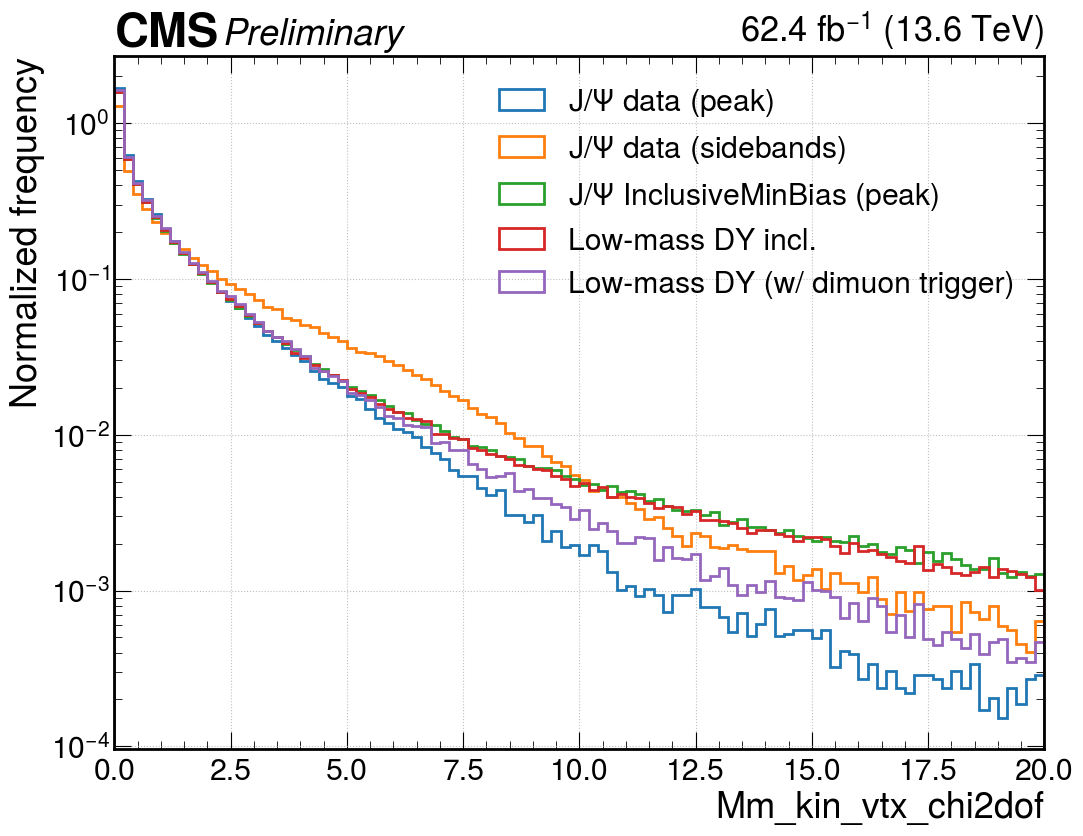

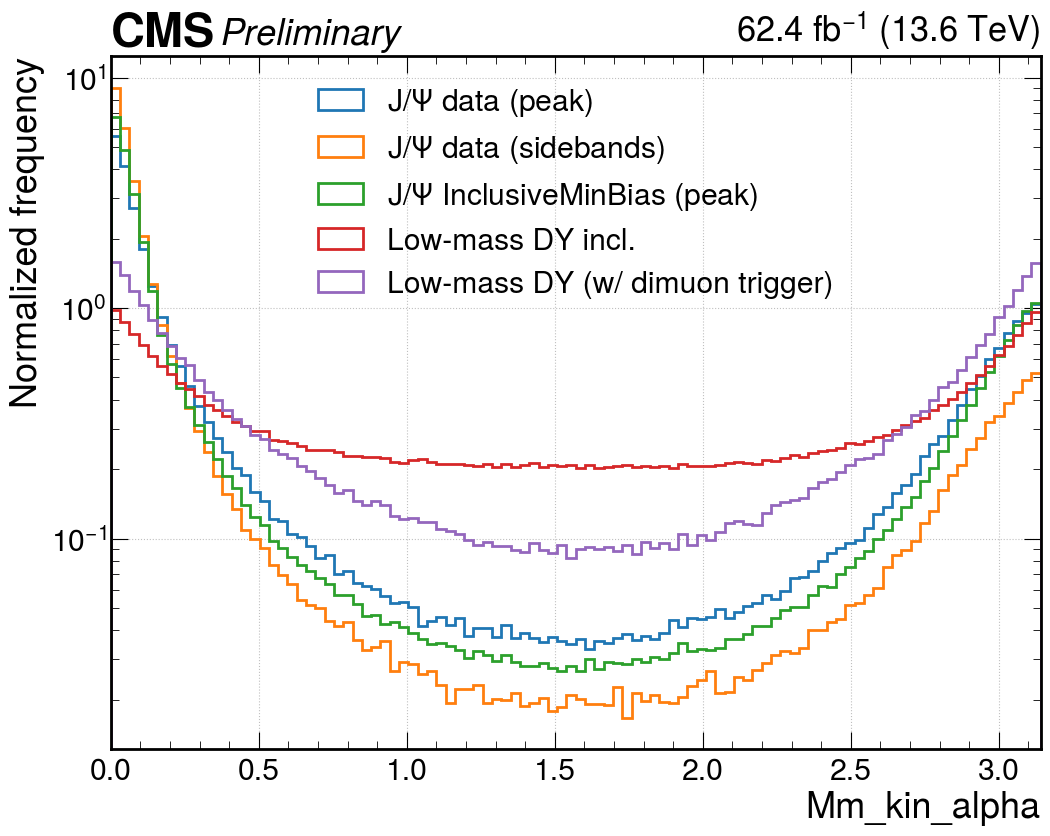

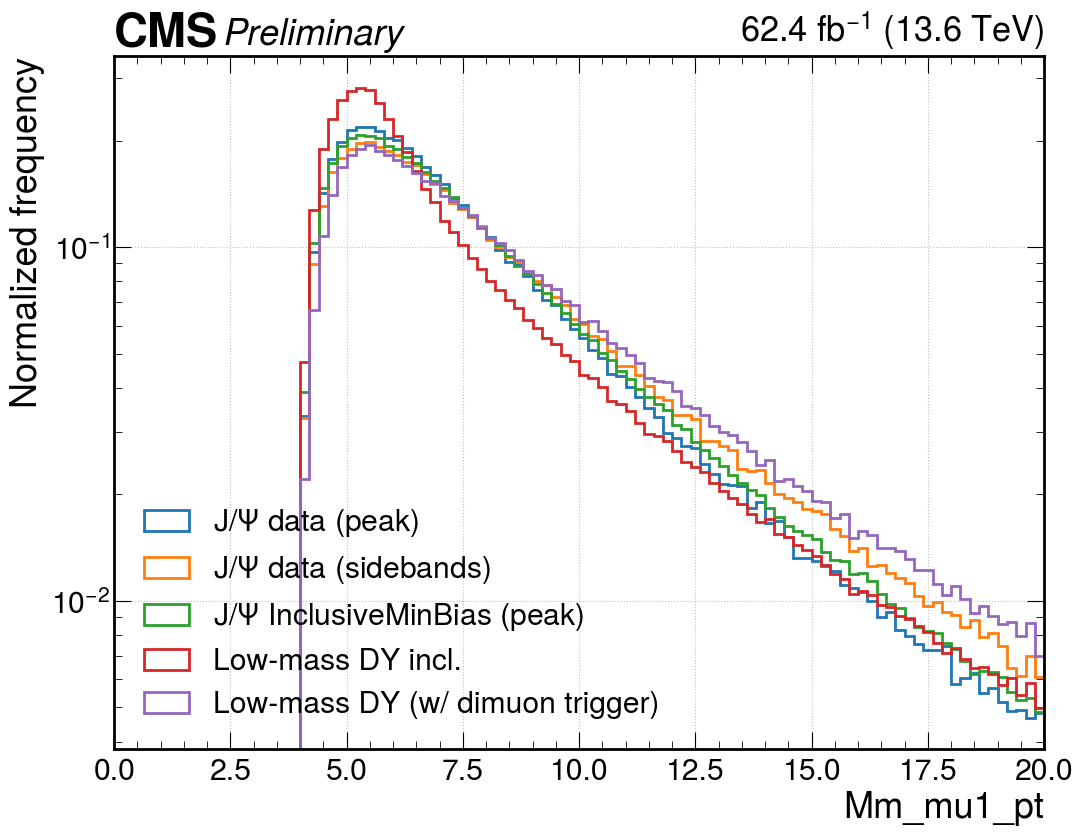

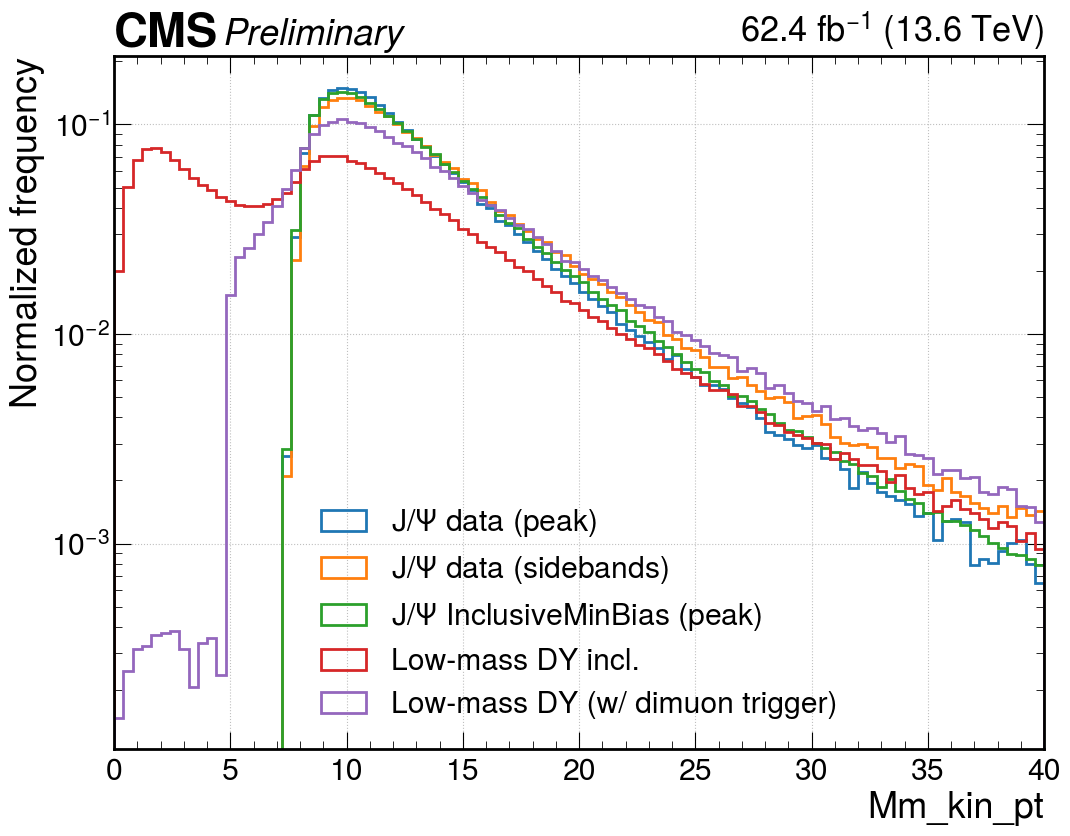

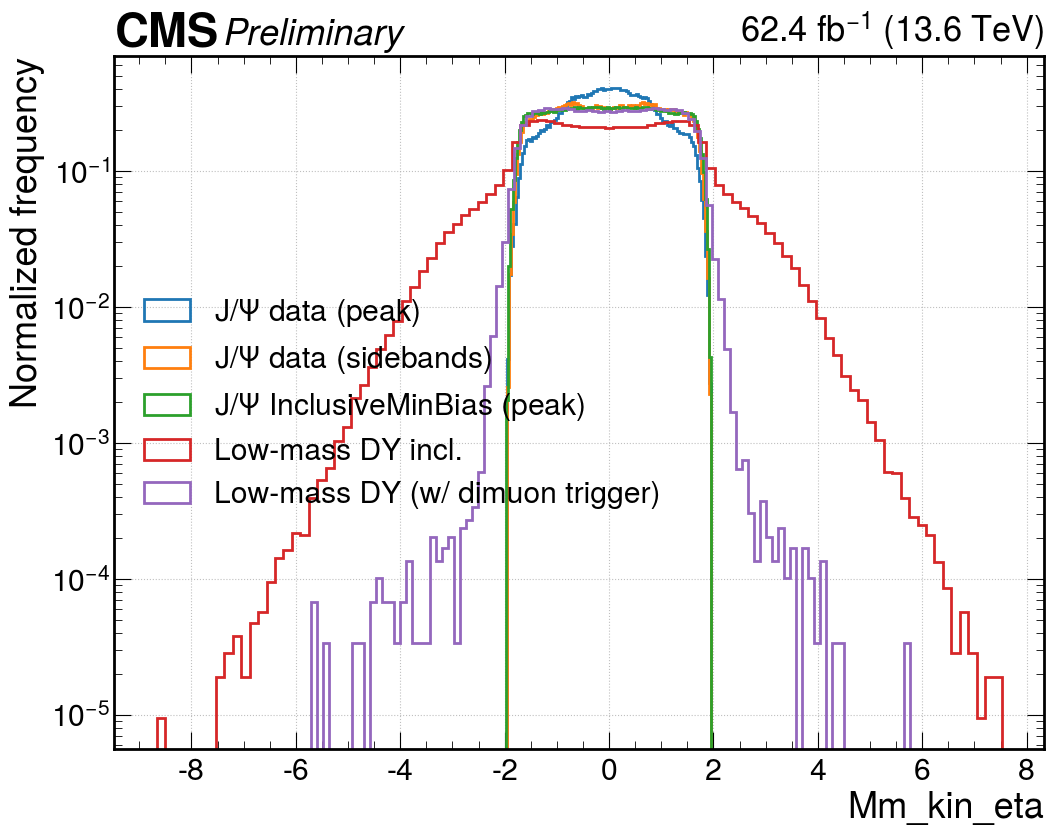

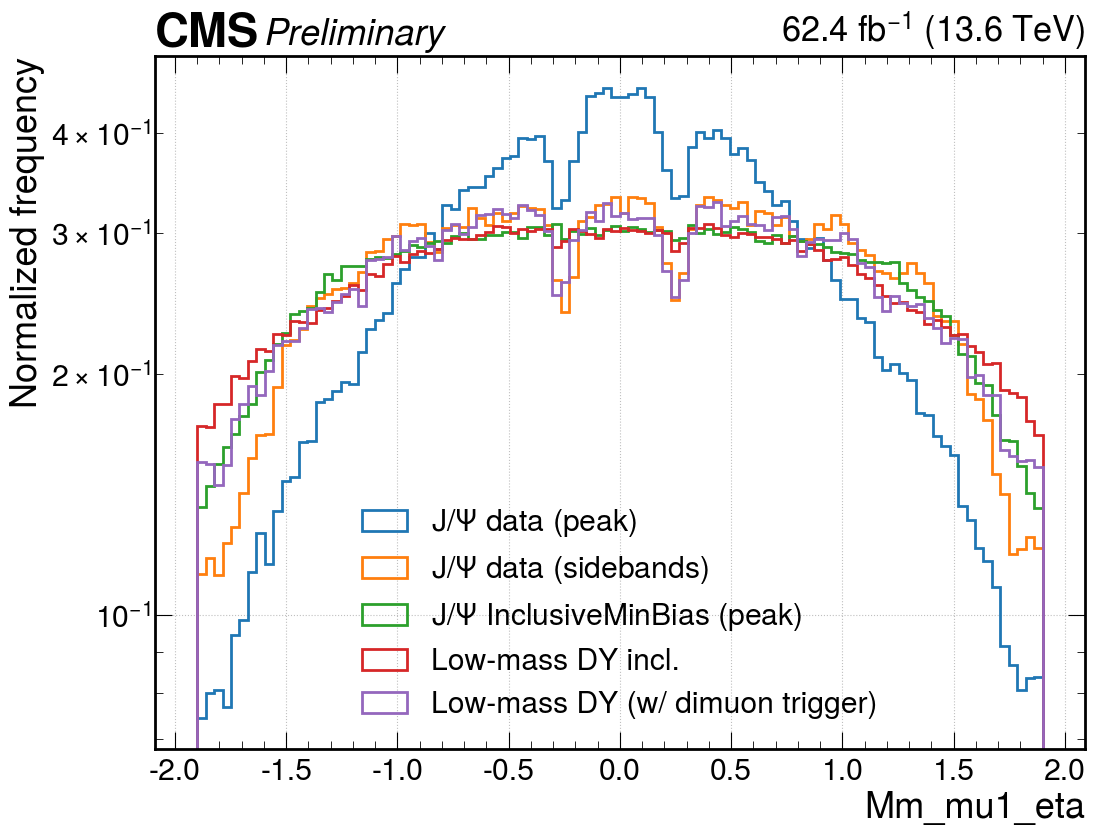

In [31]:
for q,items in branches.items():
    signal_pure = treeJpsiData[q].array()[sjpsi]
    signal_weights = treeJpsiData["weights_prompt"].array()[sjpsi]
    bkg_pure = treeJpsiData[q].array()[bkgjpsi]
    signal_MC = treeJpsiMC[q].array()#[treeMC["Mm_kin_pt"].array() > 10]
    signal_lmDY = treelmDY[q].array()#[treeMC["Mm_kin_pt"].array() > 10]
    signal_lmDY_triggered = treelmDY[q].array()[dimuonTriggerCut]#[treeMC["Mm_kin_pt"].array() > 10]
    plot_hist([signal_pure,bkg_pure,signal_MC,signal_lmDY,signal_lmDY_triggered],["J/$\Psi$ data (peak)","J/$\Psi$ data (sidebands)","J/$\Psi$ InclusiveMinBias (peak)",  "Low-mass DY incl.", "Low-mass DY (w/ dimuon trigger)"],xlabel=str(q),xlim=items['lim'],density=True, logy=True)#,signal_id,bkg_id

In [32]:
# for q,items in branches.items():
#     signal_pure = tree[q].array()[sY]
#     bkg_pure = tree[q].array()[bY]
#     signal_id = tree[q].array()[sY]
#     bkg_id = tree[q].array()[bY&id]
#     plot_hist([signal_pure,bkg_pure,signal_id,bkg_id],["signal_pure","bkg_pure","signal_id","bkg_id"],xlabel=str(q),xlim=items['lim'], int=(items['t']=="i"))#,signal_id,bkg_id

In [33]:
signal_pure = treeYData["Mm_mass"].array()
plot_hist([signal_pure],["Y"],xlabel=str("Mm_mass"),xlim=(8.5,11.2), log=False, density=True)#,signal_id,bkg_id

TypeError: plot_hist() got an unexpected keyword argument 'log'

103 210864


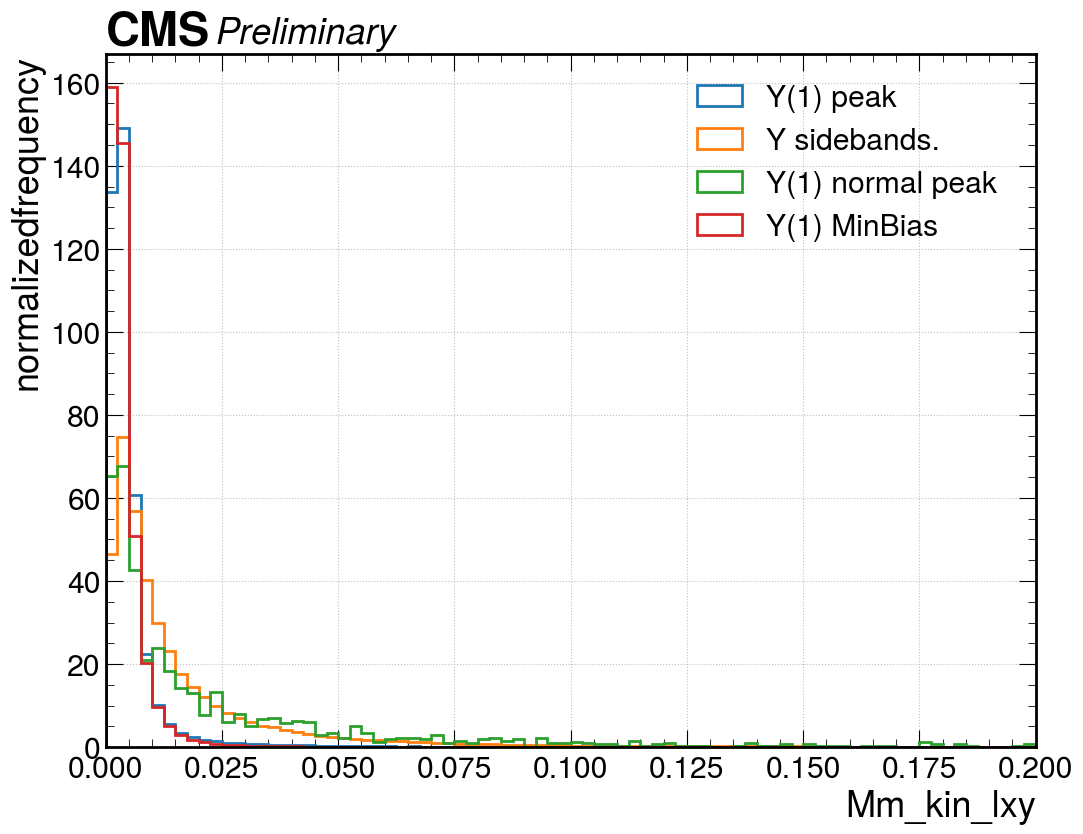

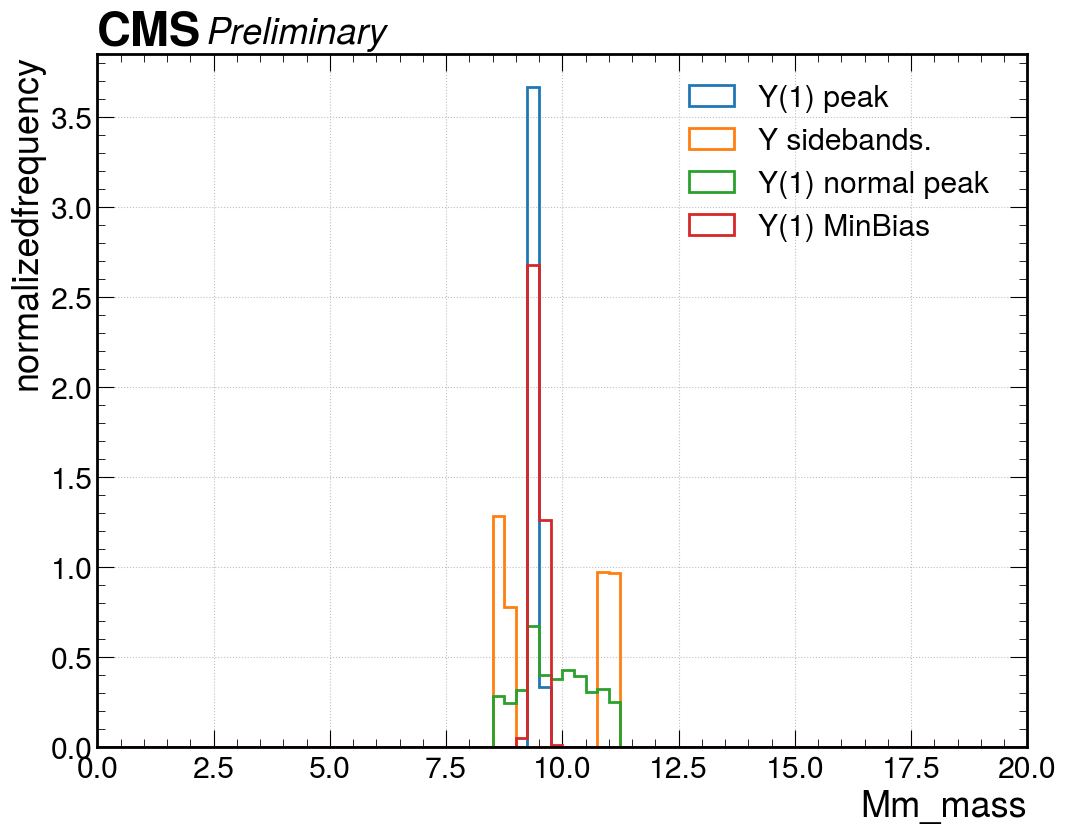

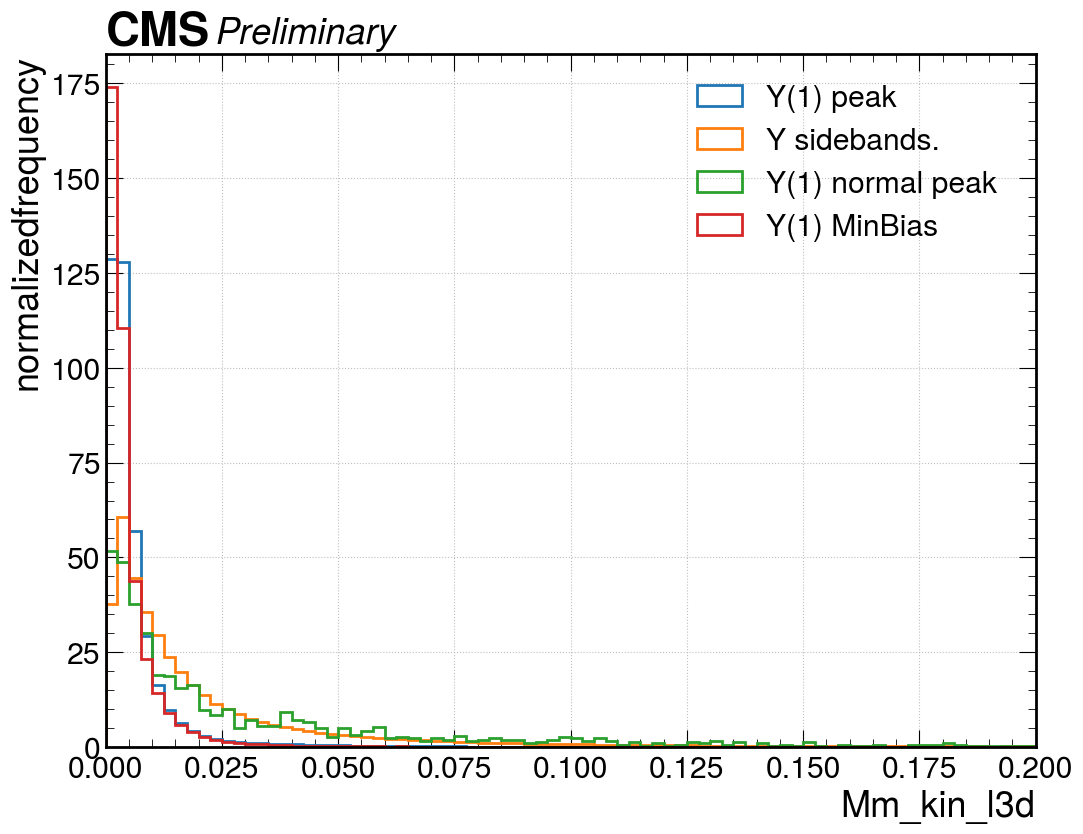

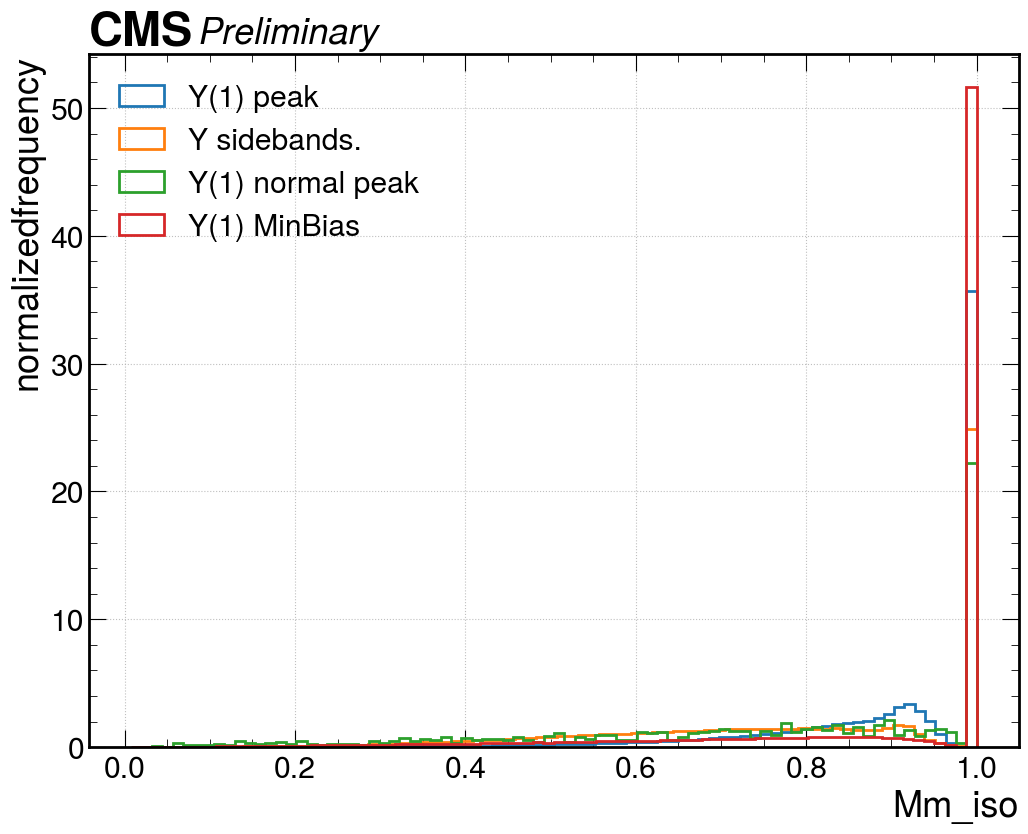

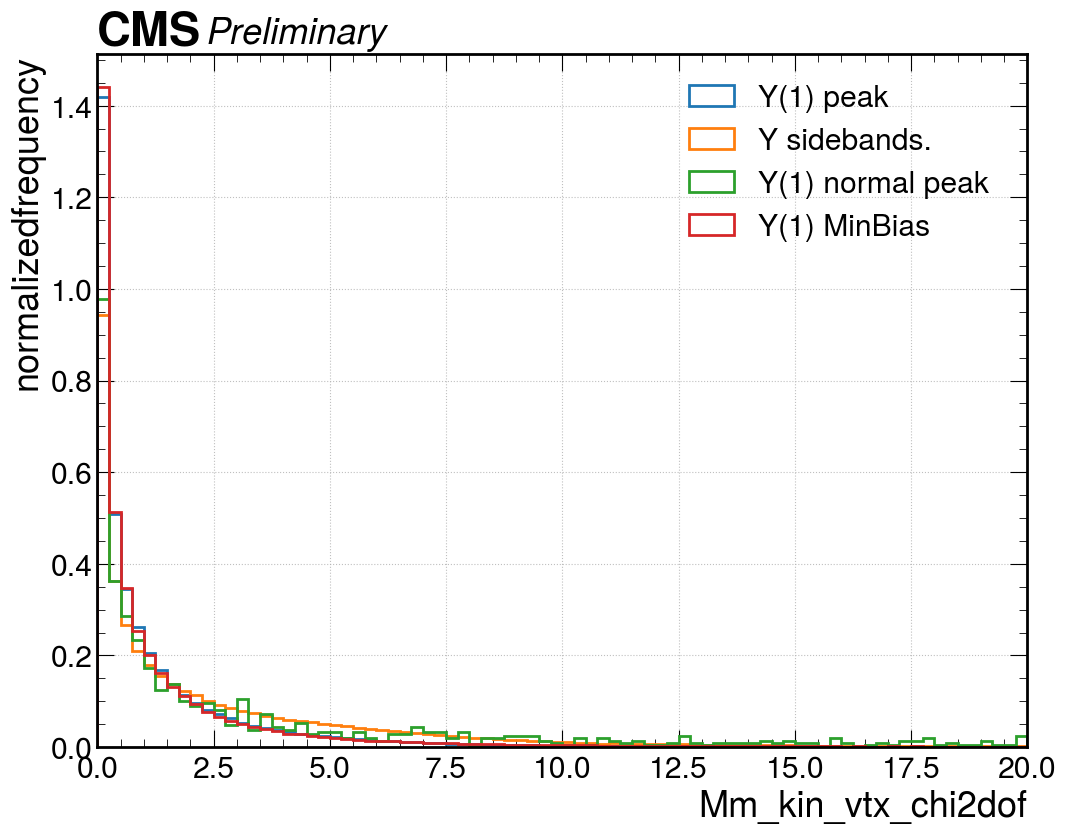

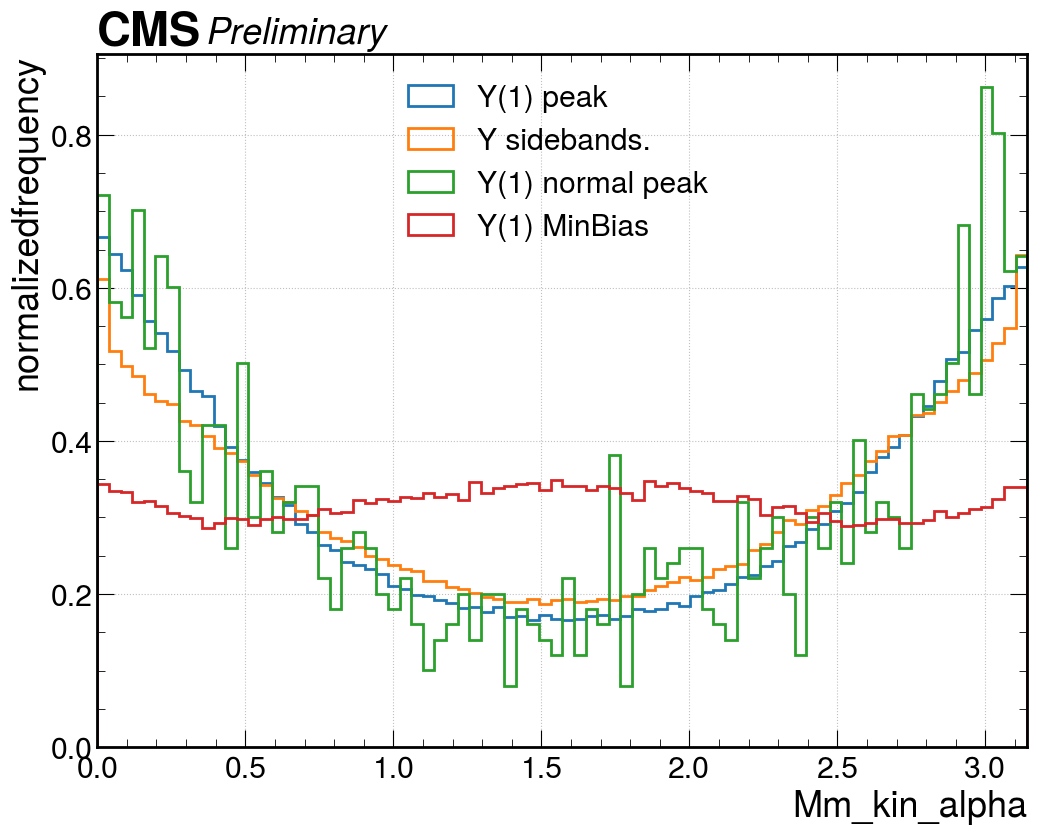

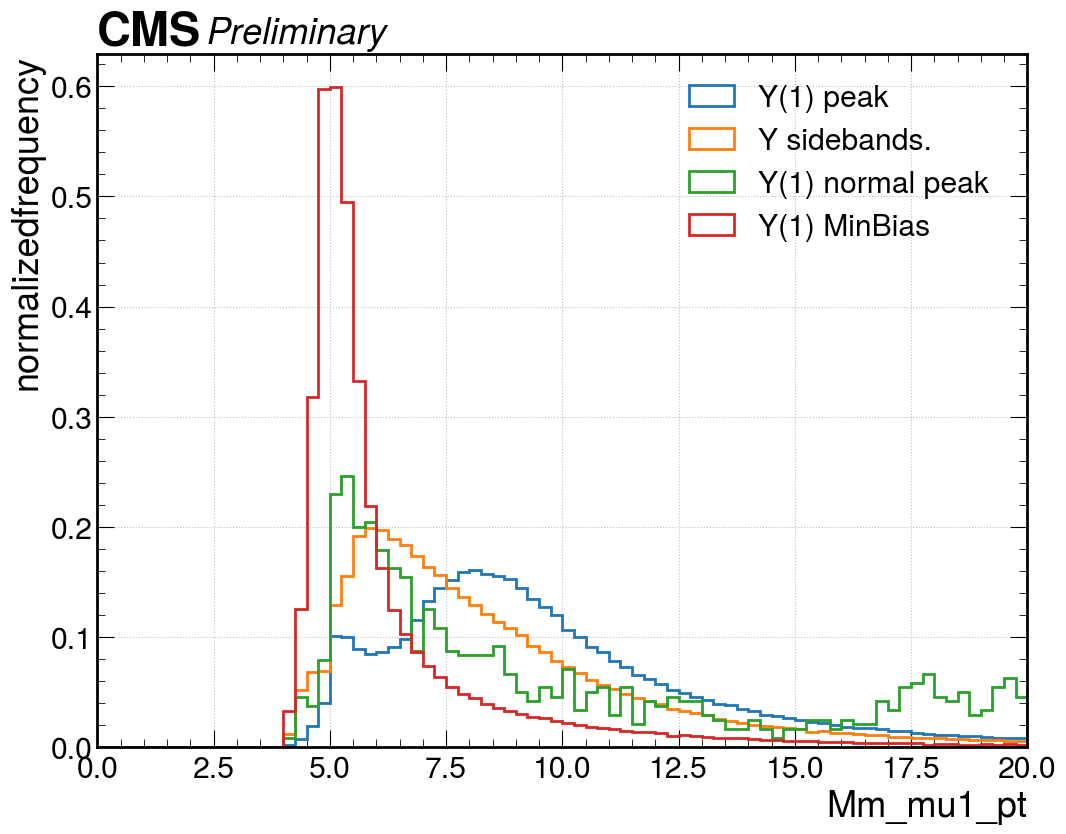

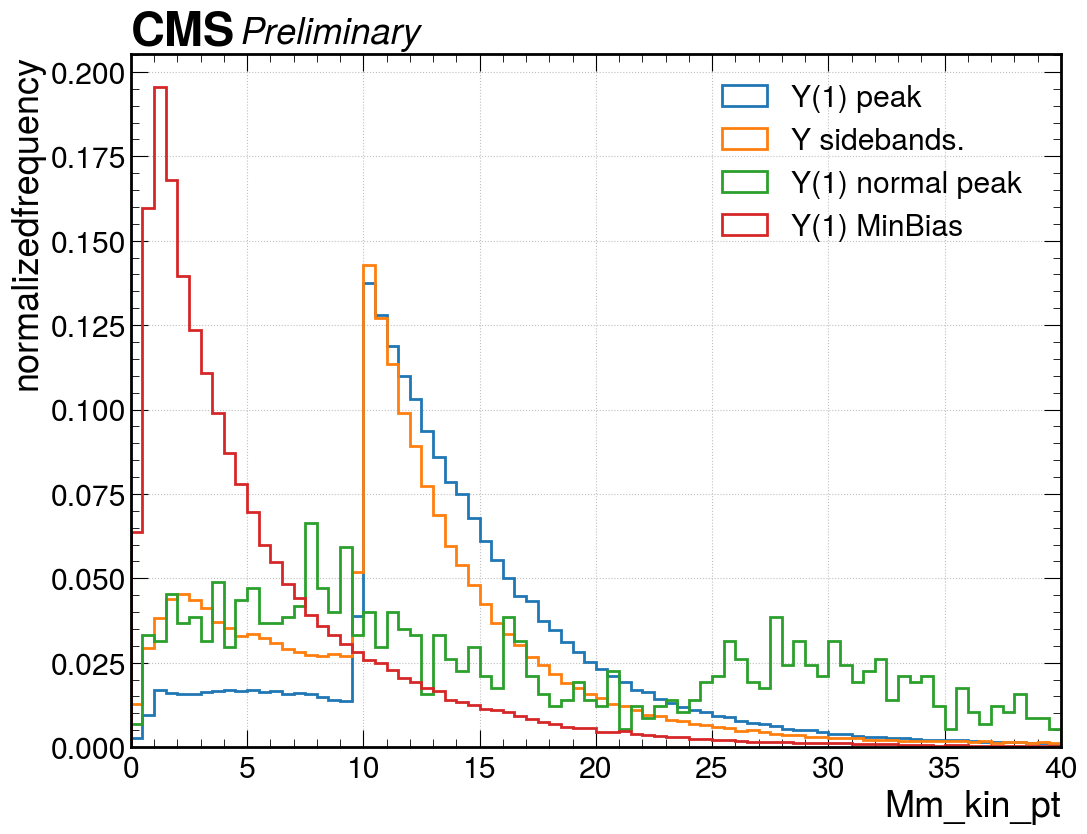

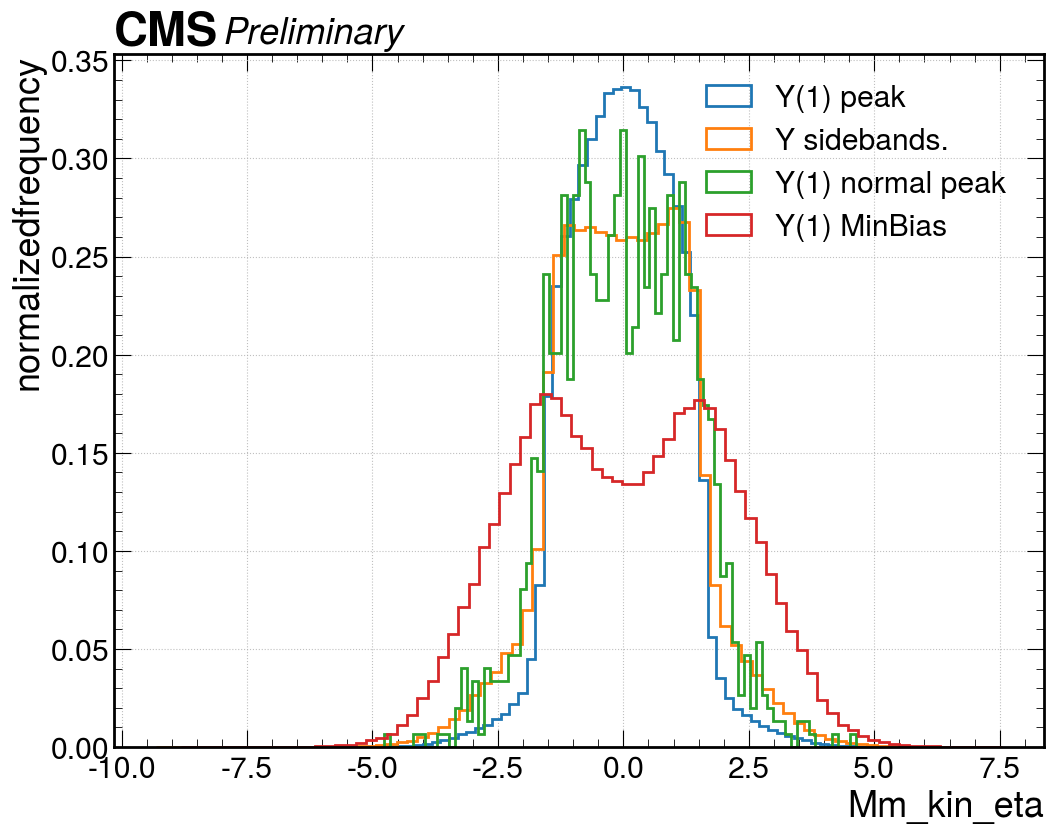

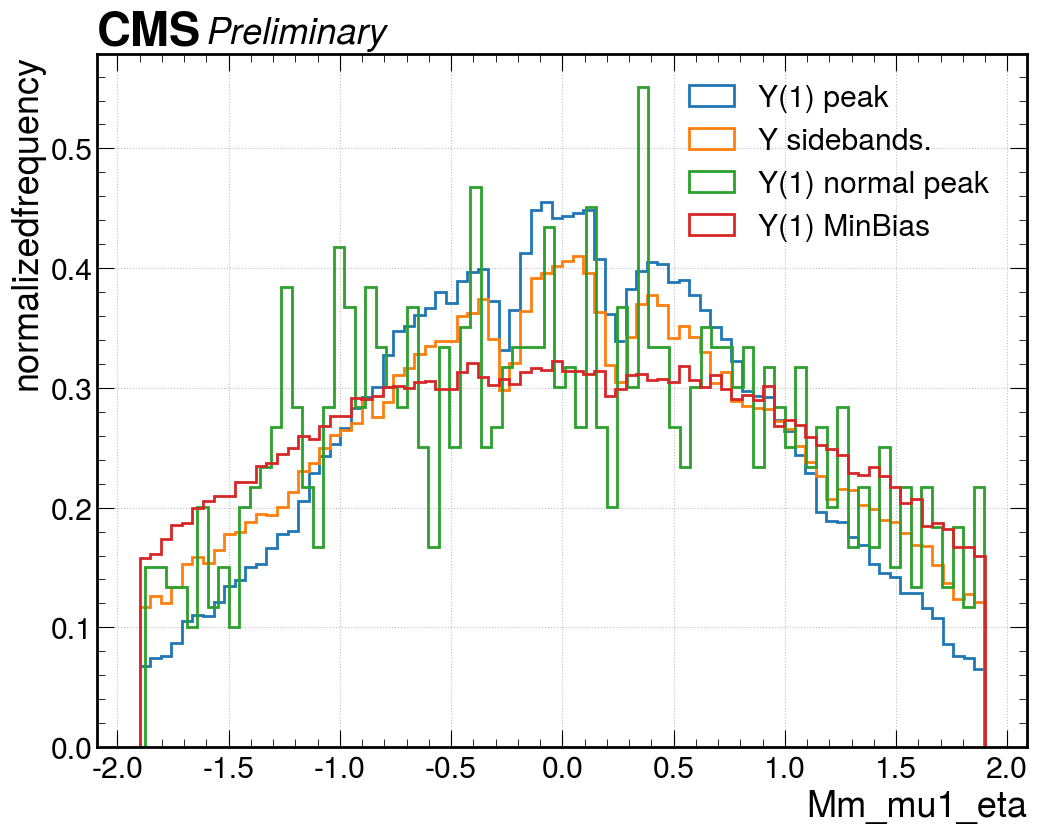

In [ ]:
dimuonCut = treeYMC["HLT_DoubleMu4_3_LowMass"].array()==1
normalYmasscut=(treeNormalData["Mm_mass"].array()>8.5) & (treeNormalData["Mm_mass"].array()<11.2 )
print(sum(dimuonCut),len(dimuonCut))
for q,items in branches.items():
    signal_pure = treeYData[q].array()[sY]
    bkg_pure = treeYData[q].array()[bkgY]
    signal_normal = treeNormalData[q].array()[normalYmasscut]#[sY_normal]
    # bkg_normal = treeNormalData[q].array()[bkgY_normal]
    YMC = treeYMC[q].array()
    plot_hist([signal_pure,bkg_pure,signal_normal,YMC],["Y(1) peak ","Y sidebands.","Y(1) normal peak ","Y(1) MinBias", "Y(1) MinBias dm trigg.", "lmDY incl.","lmDY dimuon trigger"],xlabel=str(q),xlim=items['lim'], nbins=80, log=False, density=True)#,signal_id,bkg_id

103 210864


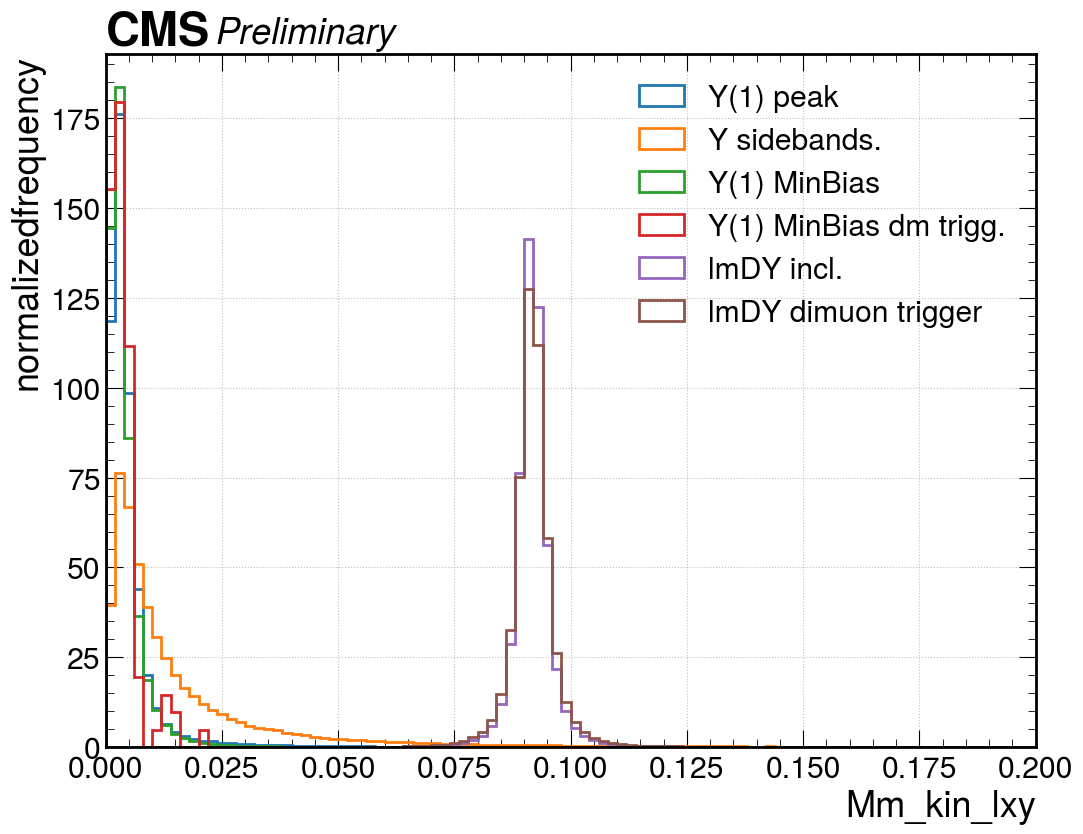

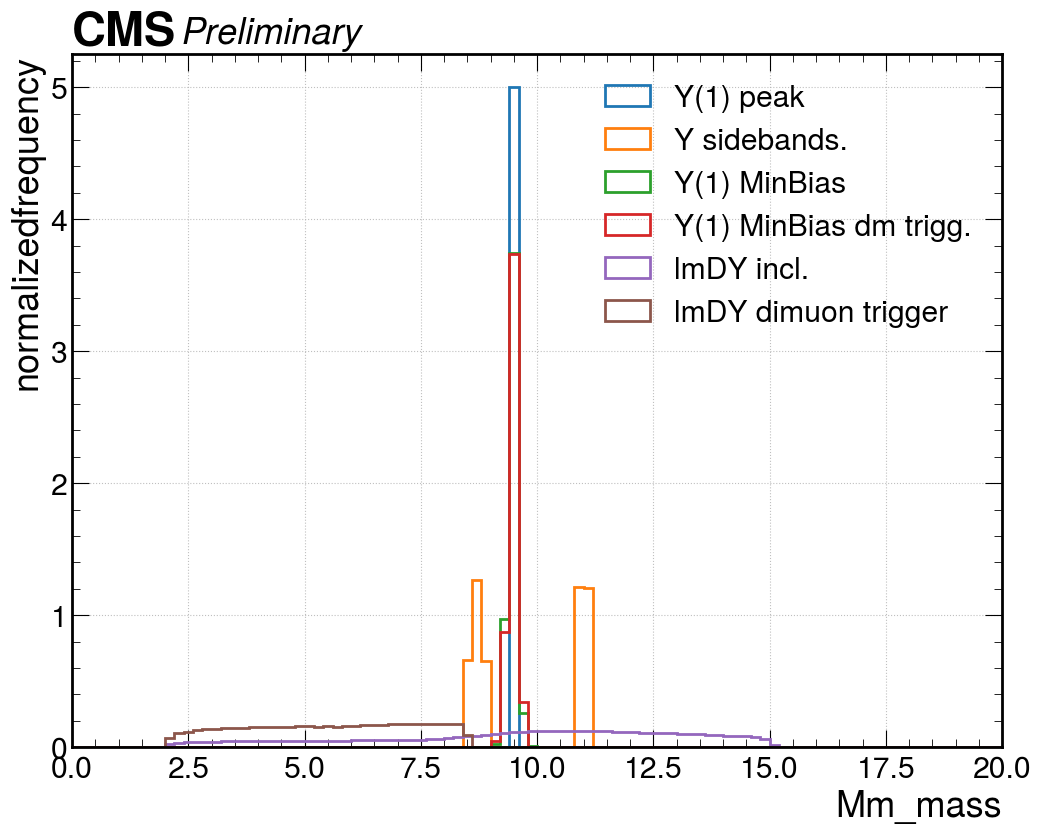

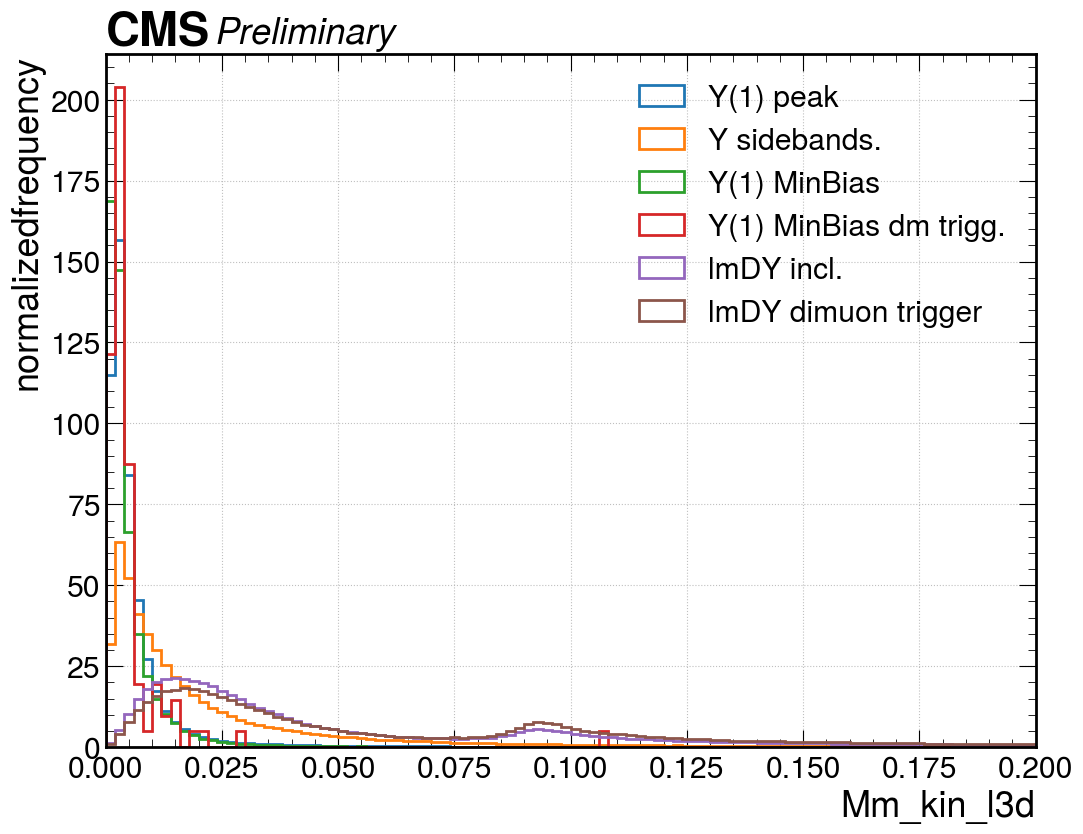

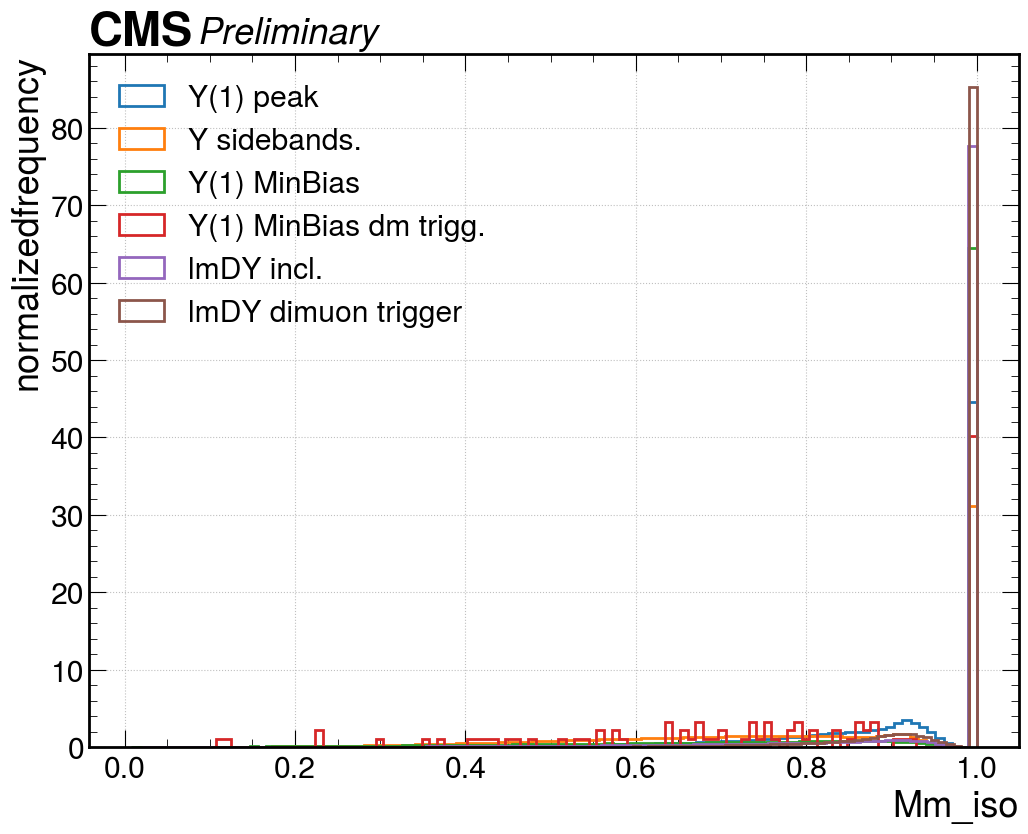

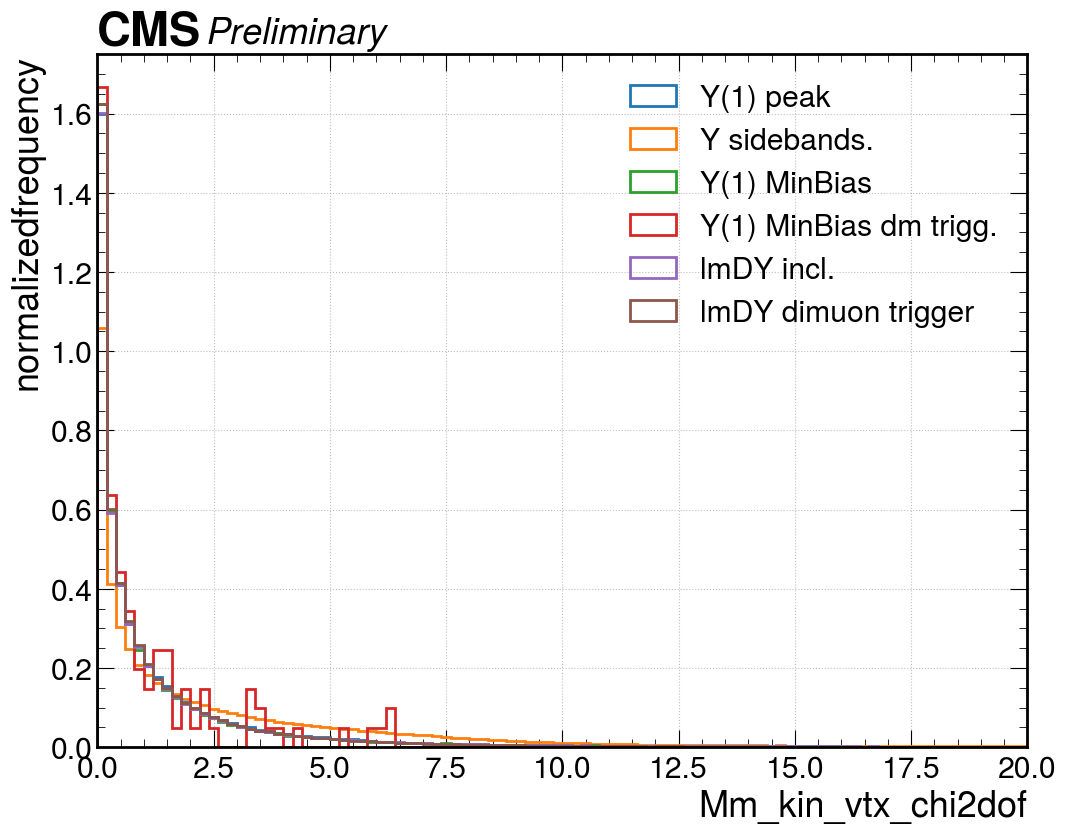

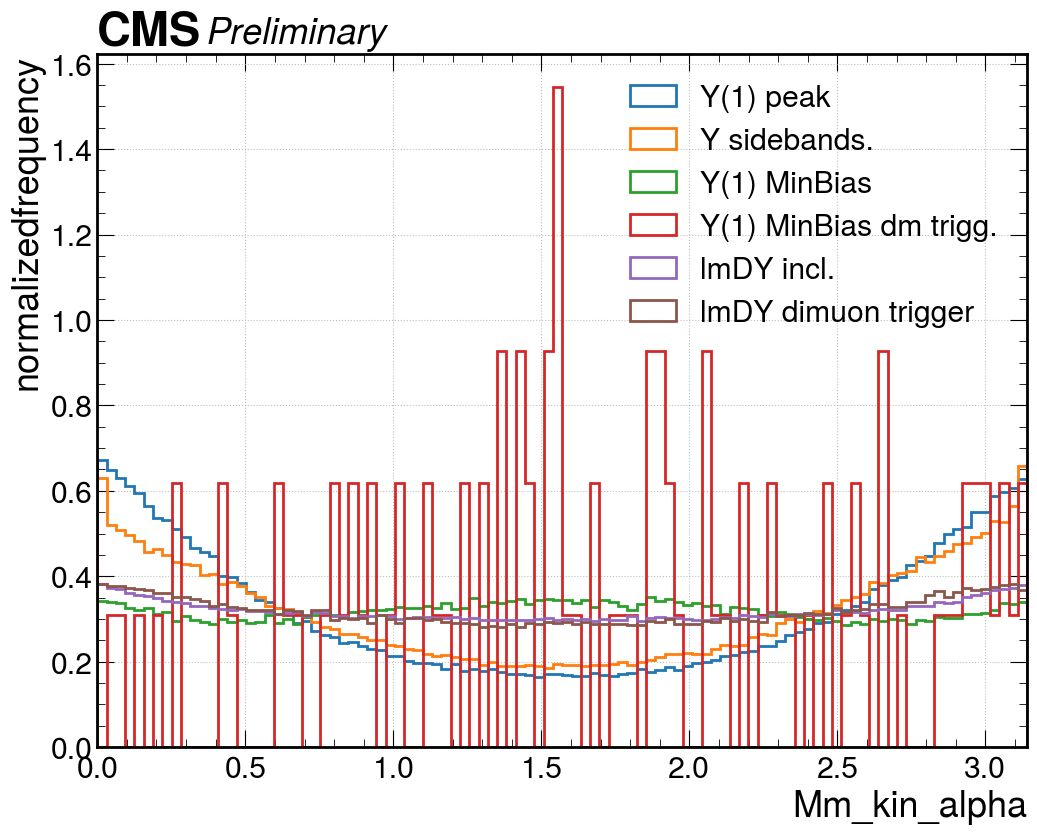

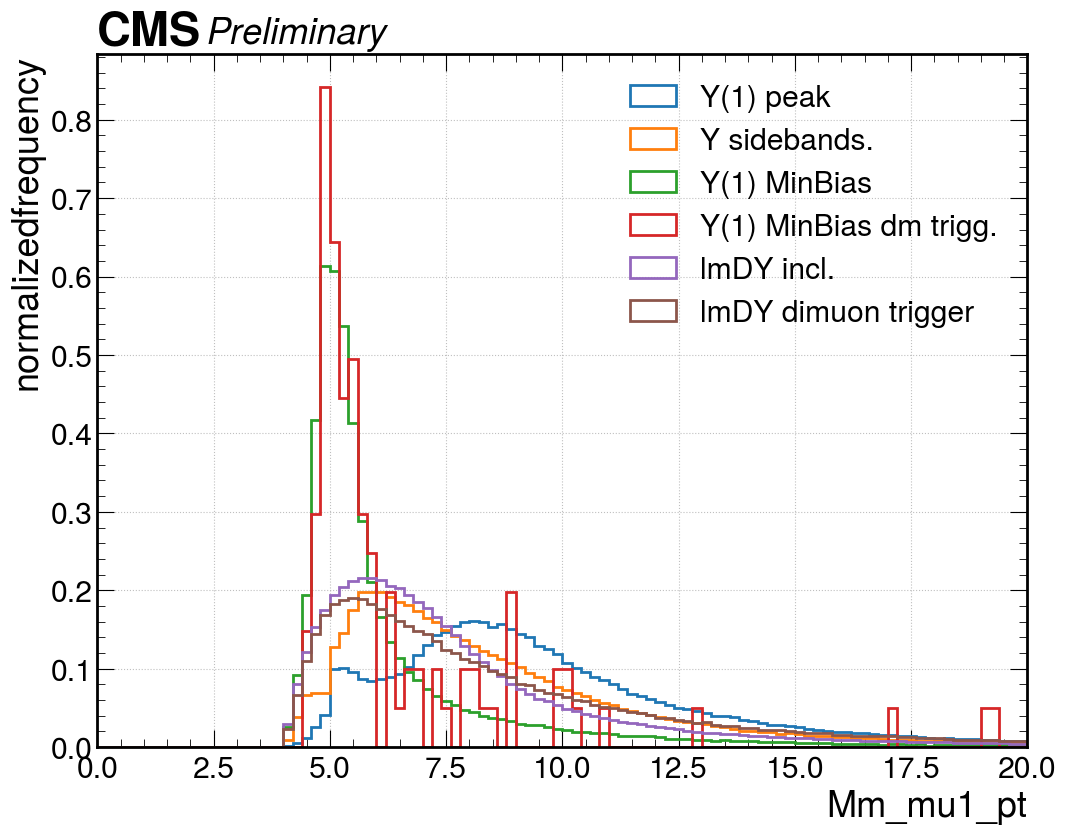

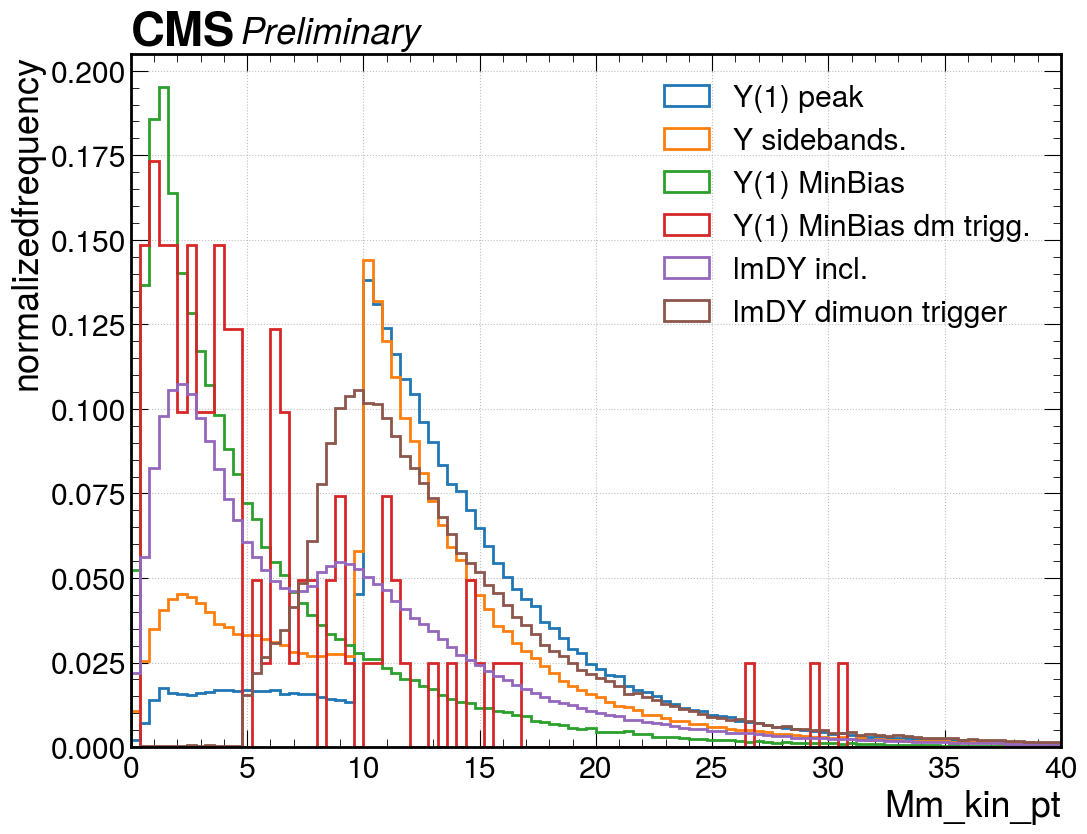

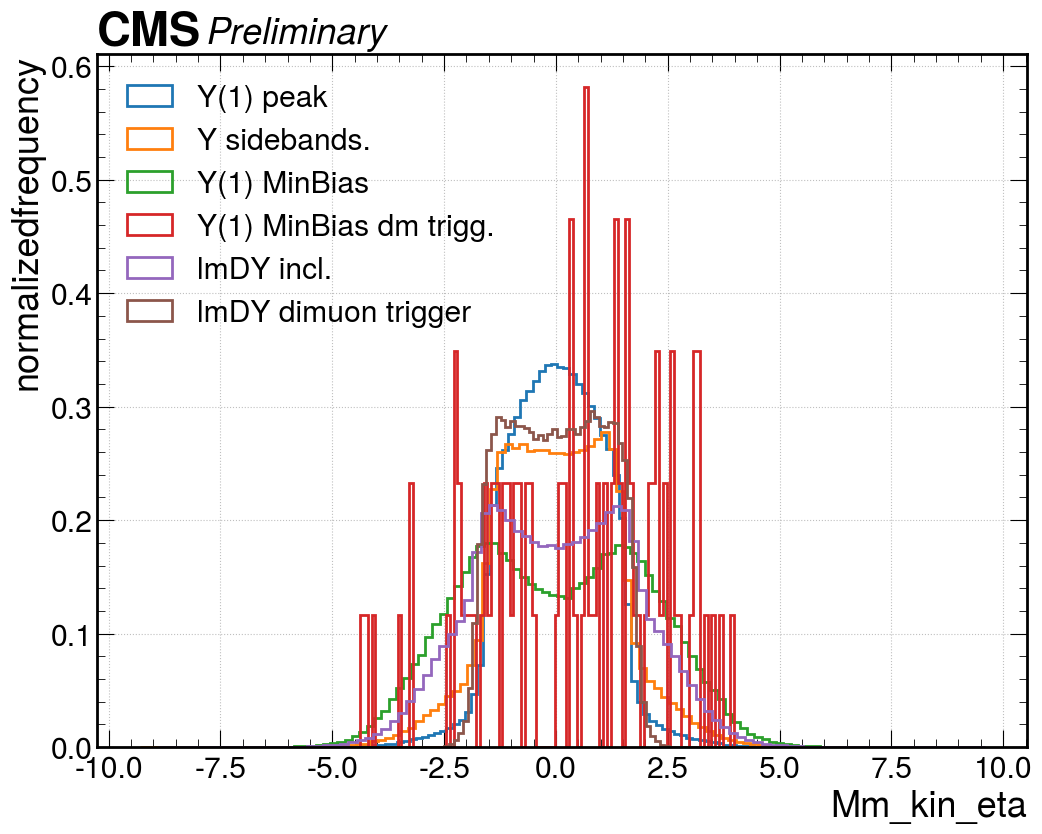

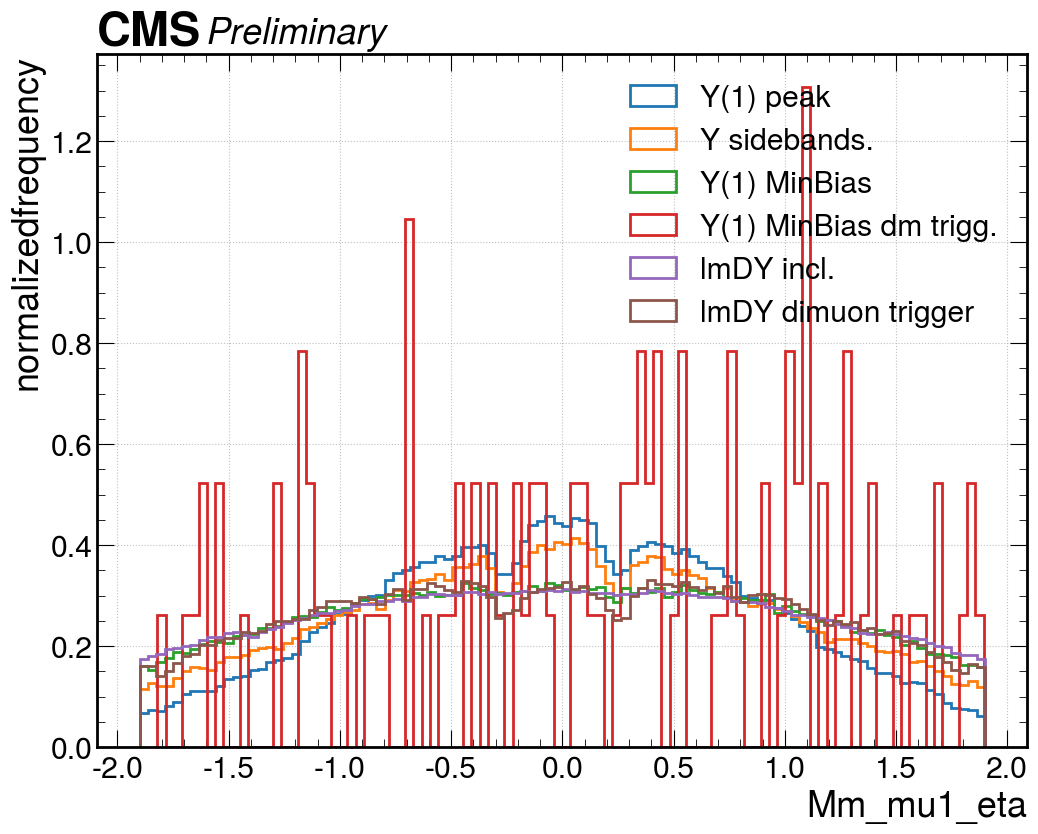

In [ ]:
dimuonCut = treeYMC["HLT_DoubleMu4_3_LowMass"].array()==1
print(sum(dimuonCut),len(dimuonCut))
for q,items in branches.items():
    signal_pure = treeYData[q].array()[sY]
    bkg_pure = treeYData[q].array()[bkgY]
    signal_normal = treeNormalData[q].array()[sY_normal]
    bkg_normal = treeNormalData[q].array()[bkgY_normal]
    YMC = treeYMC[q].array()
    signal_MC_dimuon = treeYMC[q].array()[dimuonCut]    
    signal_lmDY = treelmDY[q].array()#[treeMC["Mm_kin_pt"].array() > 10]
    signal_lmDY_triggered = treelmDY[q].array()[dimuonTriggerCut]#[treeMC["Mm_kin_pt"].array() > 10]
    plot_hist([signal_pure,bkg_pure,YMC,signal_MC_dimuon,signal_lmDY,signal_lmDY_triggered],["Y(1) peak ","Y sidebands.","Y(1) MinBias", "Y(1) MinBias dm trigg.", "lmDY incl.","lmDY dimuon trigger"],xlabel=str(q),xlim=items['lim'], log=False, density=True)#,signal_id,bkg_id

In [ ]:
# import ROOT
# file = ROOT.TFile.Open("/work/submit/mori25/Darkphotons_ludo/input.root")
# file.ls()
